In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import myutils
import Alarms



In [2]:
#visual settings
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

sns.set(style='whitegrid',palette='muted',font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

In [3]:
data1 = pd.read_csv('Data\Processed\gramma_clean.csv')
#data1 = pd.read_csv('Data\Processed\HACCP.csv')
temp = pd.read_csv('Data\Processed\Temp.csv')
check = pd.read_csv('Data\Processed\S3S4.csv')


In [4]:
# Analysis only for September 2020 and for San Lorenzo Supermarket
data1['Timetag'] = pd.to_datetime(data1['Timetag'])
#data1['Value'] = data1['Value'].apply(lambda x: float(x.split()[0].replace(',', '.')))
#data= data1[(data1['SiteID']==89259) & (data1['Timetag']<='2020-09-30')]
data =data1[data1['Timetag']>='2020-09-01']
data = data[['Timetag','AssetName','DataValue']]
data.head()



Timetag             AssetName  DataValue
0 2020-09-01      010:C.Congelados      -18.0
1 2020-09-01         011:A.Pescado      -18.4
2 2020-09-01   012:C.Pan Congelado      -20.8
3 2020-09-01  013:I.Congelados 1.1      -23.3
4 2020-09-01  014:I.Congelados 1.2      -23.3

# S3 & S4 data

In [5]:
check.head()

Unnamed: 0  SiteID                     SiteName  AssetID  \
0           0   89259  9338 Valle San Lorenzo (SM)    89602   
1           1   89259  9338 Valle San Lorenzo (SM)    89602   
2           2   89259  9338 Valle San Lorenzo (SM)    89602   
3           3   89259  9338 Valle San Lorenzo (SM)    89602   
4           4   89259  9338 Valle San Lorenzo (SM)    89602   

              AssetName  PointID                               PointName  \
0  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   
1  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   
2  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   
3  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   
4  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   

  DataValue                  Timetag Units PropertyName  
0     -31,3  2021-08-23 19:15:00.000    °C    GLOBAL_ID  
1     -31,2  2021-08-23 18:25:00.000    °C    GLOBAL_ID  
2       -31  2021-02-19 06:15:00.000    °C    GLOBAL_ID  
3     -30,9  2021-08-23 19:45:00.000    °C    GLOBAL_ID  
4     -30,9  2021-08-24 18:45:00.000    °C    GLOBAL_ID

In [6]:
test_check = check[(check['PropertyName']=='GLOBAL_ID') & (check['SiteID']==89244)].sort_values(ascending=True,by='Timetag')

test_check = test_check[['Timetag','AssetName','PointName','DataValue']]
test_check['Timetag'] = pd.to_datetime(test_check['Timetag'])

test_check['DataValue'] = test_check['DataValue'].apply(lambda x: float(x.split()[0].replace(',', '.')))

#test_check = test_check.groupby(['Timetag','PointName'])['DataValue'].mean().unstack('PointName')
test_check = test_check[(test_check['Timetag']>='2020-09-01')]
test_check

Timetag               AssetName  \
7561755 2020-09-01          058:M.Frutas 1   
7527097 2020-09-01       034:C.Charcuteria   
7585168 2020-09-01  046:SM.Charcuteria 2.1   
7643957 2020-09-01  044:SM.Charcuteria 1.2   
7178532 2020-09-01  041:C.SM.Charcuteria 2   
...            ...                     ...   
5891804 2021-08-31       051:M.Yogures 3.2   
5461447 2021-08-31          058:M.Frutas 1   
6907338 2021-08-31  044:SM.Charcuteria 1.2   
5198639 2021-08-31    014:I.Congelados 1.2   
5740161 2021-08-31    040:V.Carniceria 1.2   

                                    PointName  DataValue  
7561755          M.Frutas 1:  u16 S4 Air Temp        6.2  
7527097       C.Charcuteria:  u12 S3 Air Temp        3.8  
7585168  SM.Charcuteria 2.1:  u12 S3 Air Temp        5.5  
7643957  SM.Charcuteria 1.2:  u12 S3 Air Temp        4.6  
7178532  C.SM.Charcuteria 2:  u12 S3 Air Temp        5.9  
...                                       ...        ...  
5891804       M.Yogures 3.2:  u12 S3 Air Temp        7.7  
5461447          M.Frutas 1:  u12 S3 Air Temp        7.4  
6907338  SM.Charcuteria 1.2:  u12 S3 Air Temp        4.0  
5198639    I.Congelados 1.2:  u16 S4 Air Temp      -21.7  
5740161    V.Carniceria 1.2:  u12 S3 Air Temp        2.8  

[3905786 rows x 4 columns]

# Temperature

In [7]:
temp.head()

Unnamed: 0                                                 ID  SiteID  \
0           0      8924789435076:V Aves:  u69 Sair TempLOWTEMP-3   89247   
1           1      8924789435076:V Aves:  u69 Sair TempHIGHTEMP8   89247   
2           2  8924789454019:CB CONG Pescado:  u17 Ther AirLO...   89247   
3           3  8924789454019:CB CONG Pescado:  u17 Ther AirHI...   89247   
4           4  8924789448083:M Fruta-Verdura 1:  u17 Ther Air...   89247   

       SiteName  AssetID              AssetName  \
0  Dinosol 9303    89435             076:V Aves   
1  Dinosol 9303    89435             076:V Aves   
2  Dinosol 9303    89454    019:CB CONG Pescado   
3  Dinosol 9303    89454    019:CB CONG Pescado   
4  Dinosol 9303    89448  083:M Fruta-Verdura 1   

                          ParameterName  ParameterValue ParameterUnits  \
0            076:V Aves:  u69 Sair Temp              -3             °C   
1            076:V Aves:  u69 Sair Temp               8             °C   
2    019:CB CONG Pescado:  u17 Ther Air             -21             °C   
3    019:CB CONG Pescado:  u17 Ther Air             -15             °C   
4  083:M Fruta-Verdura 1:  u17 Ther Air               1             °C   

  PropertyName  
0      LOWTEMP  
1     HIGHTEMP  
2      LOWTEMP  
3     HIGHTEMP  
4      LOWTEMP

In [8]:
temp = temp[temp['SiteID']==89244].pivot_table(values='ParameterValue',index='AssetName',columns='PropertyName')

In [9]:
conditions = [
    (temp['LOWTEMP'] == -21), (temp['LOWTEMP'] ==-3 ),
    (temp['LOWTEMP'] == 1), (temp['LOWTEMP'] == 0),
    (temp['LOWTEMP'] == 6)
   
    ]

# create a list of the values we want to assign for each condition
values = ['freezer', 'fish/meat', 'fruits', 'milk/charcuterie','charniceria']

# create a new column and use np.select to assign values to it using our lists as arguments
temp['Group'] = np.select(conditions, values)

In [10]:
#temp.to_csv('temp_groups.csv')

temp[temp['Group']=='milk/charcuterie']

PropertyName            HIGHTEMP  LOWTEMP             Group
AssetName                                                  
034:C.Charcuteria             10        0  milk/charcuterie
037:V.Charcuteria 1.1         10        0  milk/charcuterie
038:V.Charcuteria 1.2         10        0  milk/charcuterie
041:C.SM.Charcuteria 2        10        0  milk/charcuterie
043:SM.Charcuteria 1.1        10        0  milk/charcuterie
044:SM.Charcuteria 1.2        10        0  milk/charcuterie
045:C.SM.Charcuteria 1        10        0  milk/charcuterie
046:SM.Charcuteria 2.1        10        0  milk/charcuterie
047:SM.Charcuteria 2.2        10        0  milk/charcuterie
048:SM.Charcuteria 2.3        10        0  milk/charcuterie
050:M.Yogures 3.1             10        0  milk/charcuterie
051:M.Yogures 3.2             10        0  milk/charcuterie
052:M.Yogures 2               10        0  milk/charcuterie
053:M.Yogures 1.1             10        0  milk/charcuterie
054:M.Yogures 1.2             10        0  milk/charcuterie
055:M.Yogures 1.3             10        0  milk/charcuterie

In [11]:
temp

PropertyName            HIGHTEMP  LOWTEMP             Group
AssetName                                                  
010:C.Congelados             -15      -21           freezer
011:A.Pescado                -15      -21           freezer
012:C.Pan Congelado          -15      -21           freezer
013:I.Congelados 1.1         -15      -21           freezer
014:I.Congelados 1.2         -15      -21           freezer
015:I.Congelados 1.3         -15      -21           freezer
016:C.I.Congelados 2         -15      -21           freezer
017:C.I.Congelados 4         -15      -21           freezer
018:I.Congelados 2.1         -15      -21           freezer
019:I.Congelados 2.2         -15      -21           freezer
020:I.Congelados 2.3         -15      -21           freezer
021:C.I.Congelados 3         -15      -21           freezer
022:A.Tartas                 -15      -21           freezer
030:C.Pescado                  7       -3         fish/meat
031:O.Carniceria              21        6       charniceria
032:C.Carniceria               8       -3         fish/meat
033:O.Charcuteria             21        6       charniceria
034:C.Charcuteria             10        0  milk/charcuterie
035:O.Fruteria                21        6       charniceria
036:C.Fruteria                12        1            fruits
037:V.Charcuteria 1.1         10        0  milk/charcuterie
038:V.Charcuteria 1.2         10        0  milk/charcuterie
039:V.Carniceria 1.1           8       -3         fish/meat
040:V.Carniceria 1.2           8       -3         fish/meat
041:C.SM.Charcuteria 2        10        0  milk/charcuterie
042:SM.Carniceria              8       -3         fish/meat
043:SM.Charcuteria 1.1        10        0  milk/charcuterie
044:SM.Charcuteria 1.2        10        0  milk/charcuterie
045:C.SM.Charcuteria 1        10        0  milk/charcuterie
046:SM.Charcuteria 2.1        10        0  milk/charcuterie
047:SM.Charcuteria 2.2        10        0  milk/charcuterie
048:SM.Charcuteria 2.3        10        0  milk/charcuterie
049:M.Pescado                  7       -3         fish/meat
050:M.Yogures 3.1             10        0  milk/charcuterie
051:M.Yogures 3.2             10        0  milk/charcuterie
052:M.Yogures 2               10        0  milk/charcuterie
053:M.Yogures 1.1             10        0  milk/charcuterie
054:M.Yogures 1.2             10        0  milk/charcuterie
055:M.Yogures 1.3             10        0  milk/charcuterie
056:M.Frutas 2.1              12        1            fruits
057:M.Frutas 2.2              12        1            fruits
058:M.Frutas 1                12        1            fruits

# New data table

In [10]:
#merge temperature and data from lorezno
data_merge = pd.merge(data, temp, left_on = 'AssetName', right_index=True)

In [11]:
assert len(data_merge)>0

In [12]:
conditions = [
    (data_merge['DataValue'] < data_merge['LOWTEMP']),
    (data_merge['DataValue'] > data_merge['HIGHTEMP']), 
    (data_merge['DataValue'] >= data_merge['LOWTEMP'])
     & (data_merge['DataValue'] <= data_merge['HIGHTEMP'])
    ]
values = [-1, 1, 0]
data_merge['Defrost'] = np.select(conditions, values)

In [13]:
#Choose only relevant columns (Check whether the same AssetID are across the stores)
selected = data_merge[['AssetName','DataValue','Timetag','Defrost']].loc[data_merge['Group']=='freezer'].sort_values(ascending=True,by='Timetag')#.set_index('Timetag')
selected.head(10)

AssetName  DataValue    Timetag  Defrost
0       010:C.Congelados      -18.0 2020-09-01        0
9   019:I.Congelados 2.2      -20.0 2020-09-01        0
4   014:I.Congelados 1.2      -23.3 2020-09-01       -1
7   017:C.I.Congelados 4      -17.4 2020-09-01        0
6   016:C.I.Congelados 2      -18.2 2020-09-01        0
2    012:C.Pan Congelado      -20.8 2020-09-01        0
5   015:I.Congelados 1.3      -19.8 2020-09-01        0
8   018:I.Congelados 2.1      -17.0 2020-09-01        0
12          022:A.Tartas      -19.8 2020-09-01        0
3   013:I.Congelados 1.1      -23.3 2020-09-01       -1

In [14]:
check_merge=pd.merge(test_check, temp, left_on = 'AssetName', right_index=True)
check_freezer = check_merge[check_merge['Group']=='freezer']
check_freezer = check_freezer[['Timetag','AssetName','PointName','DataValue']]

In [15]:
check_freezer

Timetag             AssetName  \
7168010 2020-09-01 00:00:00  016:C.I.Congelados 2   
7156903 2020-09-01 00:00:00  016:C.I.Congelados 2   
7119180 2020-09-01 00:10:00  016:C.I.Congelados 2   
7095644 2020-09-01 00:10:00  016:C.I.Congelados 2   
7113932 2020-09-01 00:20:00  016:C.I.Congelados 2   
...                     ...                   ...   
5213692 2021-08-30 23:40:00  014:I.Congelados 1.2   
5647716 2021-08-30 23:50:00  014:I.Congelados 1.2   
5278015 2021-08-30 23:50:00  014:I.Congelados 1.2   
5659609 2021-08-31 00:00:00  014:I.Congelados 1.2   
5198639 2021-08-31 00:00:00  014:I.Congelados 1.2   

                                  PointName  DataValue  
7168010  C.I.Congelados 2:  u16 S4 Air Temp      -22.6  
7156903  C.I.Congelados 2:  u12 S3 Air Temp      -13.9  
7119180  C.I.Congelados 2:  u12 S3 Air Temp       -0.5  
7095644  C.I.Congelados 2:  u16 S4 Air Temp       -0.4  
7113932  C.I.Congelados 2:  u12 S3 Air Temp        7.8  
...                                     ...        ...  
5213692  I.Congelados 1.2:  u12 S3 Air Temp      -12.0  
5647716  I.Congelados 1.2:  u16 S4 Air Temp      -20.9  
5278015  I.Congelados 1.2:  u12 S3 Air Temp      -12.0  
5659609  I.Congelados 1.2:  u12 S3 Air Temp      -12.4  
5198639  I.Congelados 1.2:  u16 S4 Air Temp      -21.7  

[1297782 rows x 4 columns]

# Consecutive points

In [16]:
def classes(df):
     if test_check.shape[1] >= 3:
          
          if df['Status_'+i] =='Anomaly_Above' and df['S4S3_State_'+i] ==1 and df['open/close'] == 0:
               classes = 'anomaly_critical_close_above'

          elif df['Status_'+i] =='Anomaly_Above' and df['S4S3_State_'+i] ==1 and df['open/close'] == 1:
               classes ='anomaly_critical_open_above'

          elif df['Status_'+i] =='Anomaly_Above' and df['S4S3_State_'+i] ==0 and df['open/close'] == 0:
               classes ='anomaly_close_above'

          elif df['Status_'+i] =='Anomaly_Above' and df['S4S3_State_'+i] ==0 and df['open/close'] == 1:
               classes ='anomaly_open_above'

          elif df['Status_'+i] =='Anomaly_Below' and df['S4S3_State_'+i] ==1 and df['open/close'] == 0:
               classes ='anomaly_critical_close_below'

          elif df['Status_'+i] =='Anomaly_Below' and df['S4S3_State_'+i] ==1 and df['open/close'] == 1:
               classes ='anomaly_critical_open_below'

          elif df['Status_'+i] =='Anomaly_Below' and df['S4S3_State_'+i] ==0 and df['open/close'] == 0:
               classes ='anomaly_close_below'

          elif df['Status_'+i] =='Anomaly_Below' and df['S4S3_State_'+i] ==0 and df['open/close'] == 1:
               classes = 'anomaly_open_below'
          
          else:
               classes = df['Status_'+i]
               
     else:

          if df['Status_'+i] =='Anomaly_Above' and df['open/close'] == 0:
               classes ='anomaly_close_above'

          elif df['Status_'+i] =='Anomaly_Above' and df['open/close'] == 1:
               classes ='anomaly_open_above'

          elif df['Status_'+i] =='Anomaly_Below' and df['open/close'] == 0:
               classes ='anomaly_close_below'

          elif df['Status_'+i] =='Anomaly_Below' and df['open/close'] == 1:
               classes ='anomaly_open_below'

          else:
               classes = df['Status_'+i]

     return classes

In [17]:
assets = [i for i in selected.AssetName.unique()]


In [18]:
import warnings
warnings.filterwarnings("ignore")

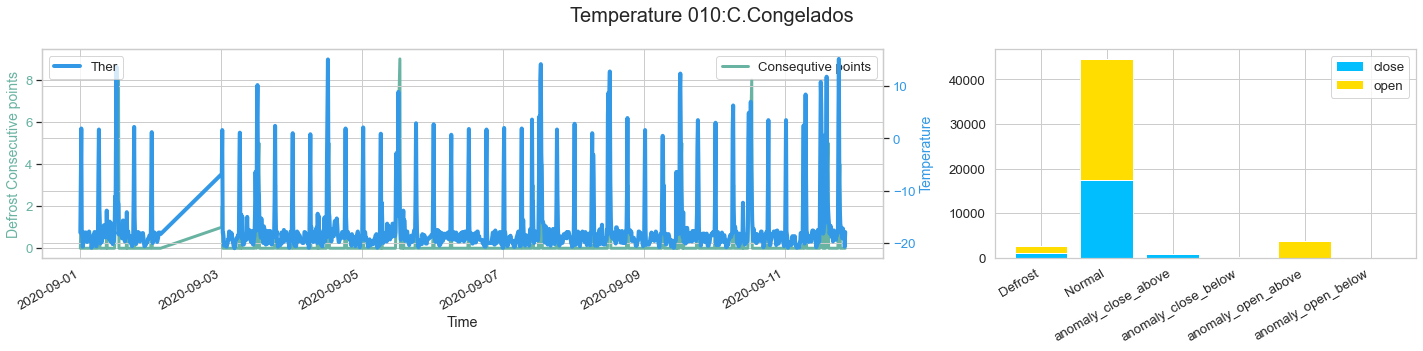

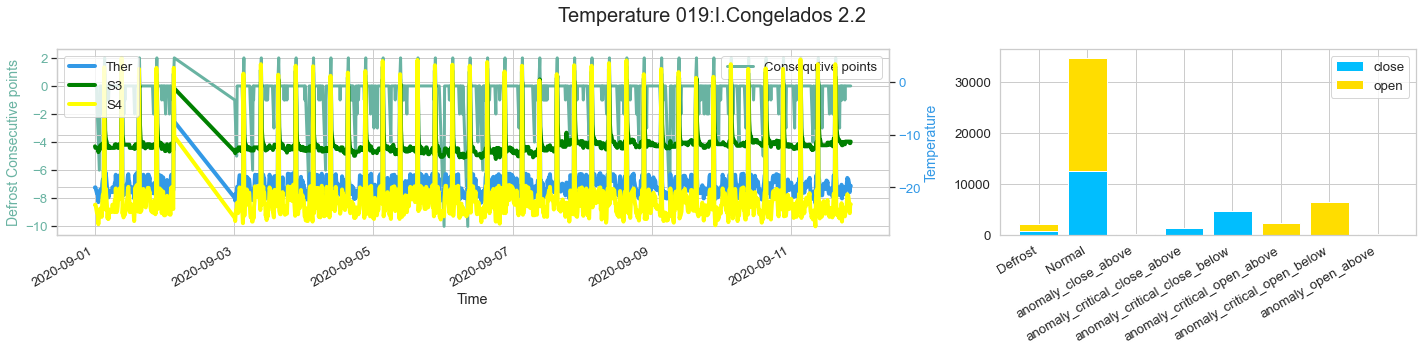

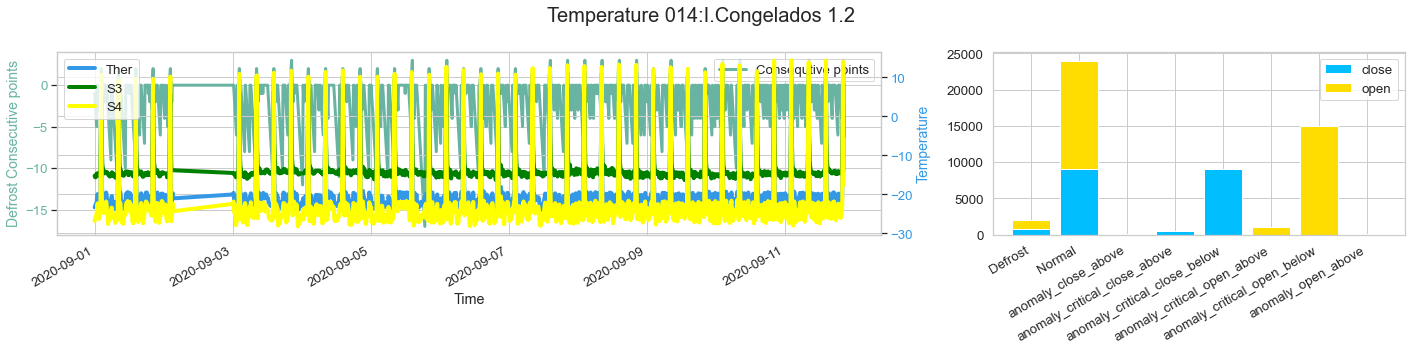

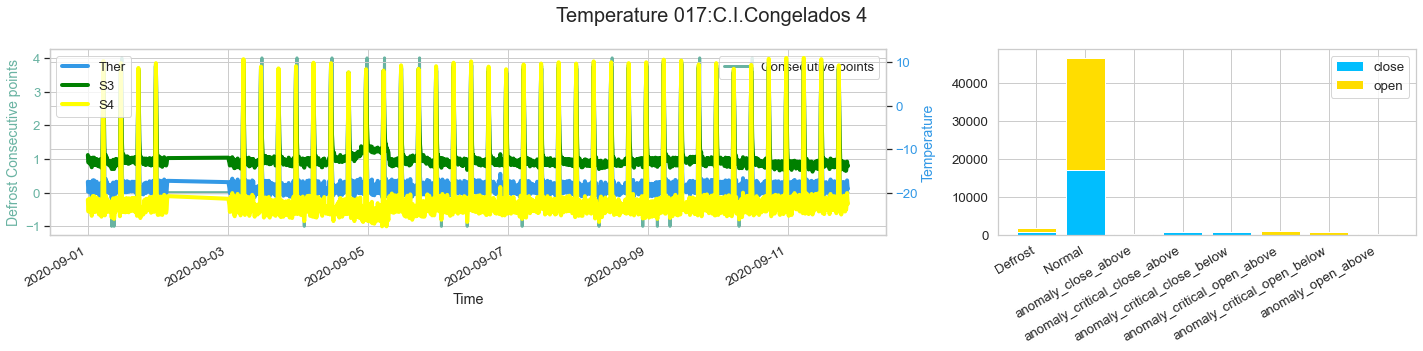

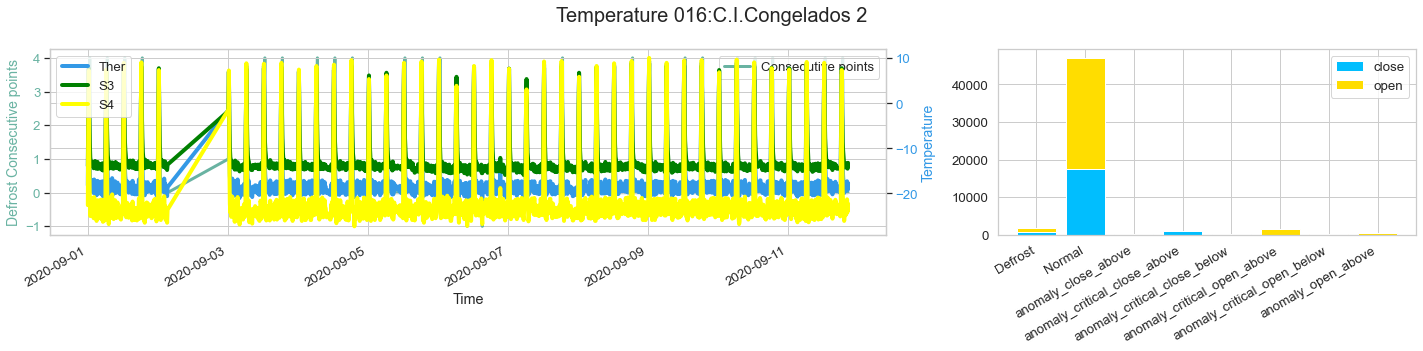

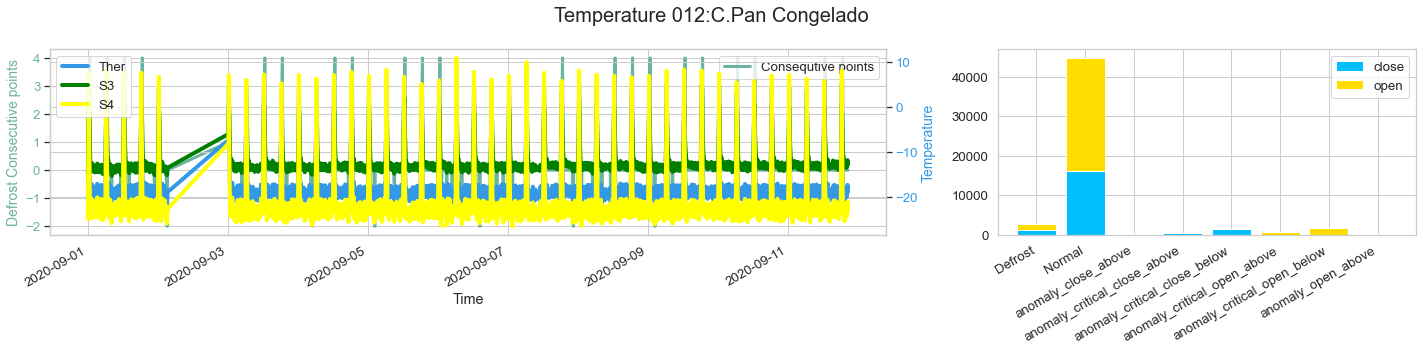

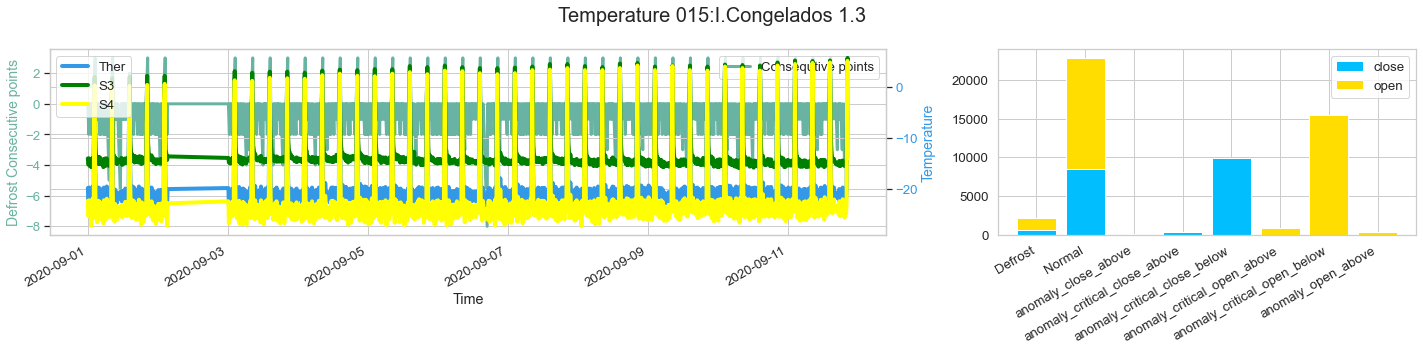

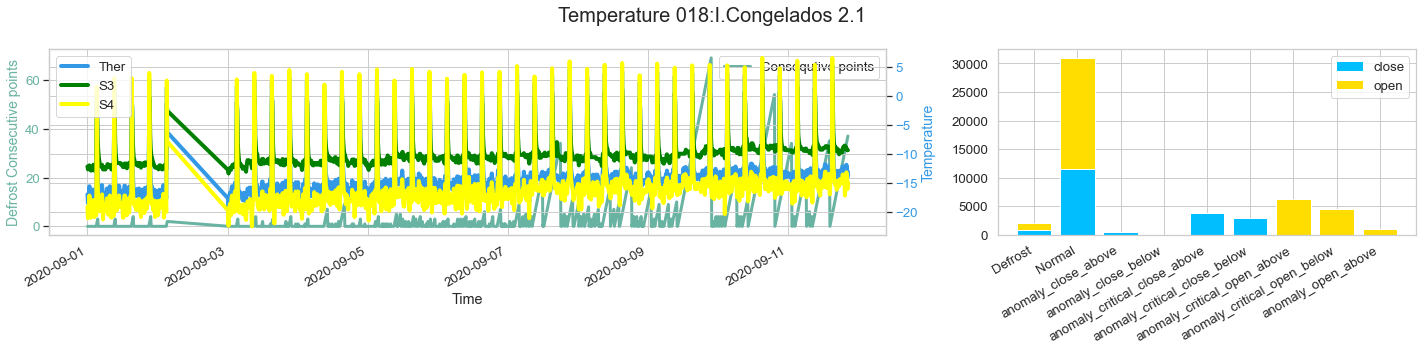

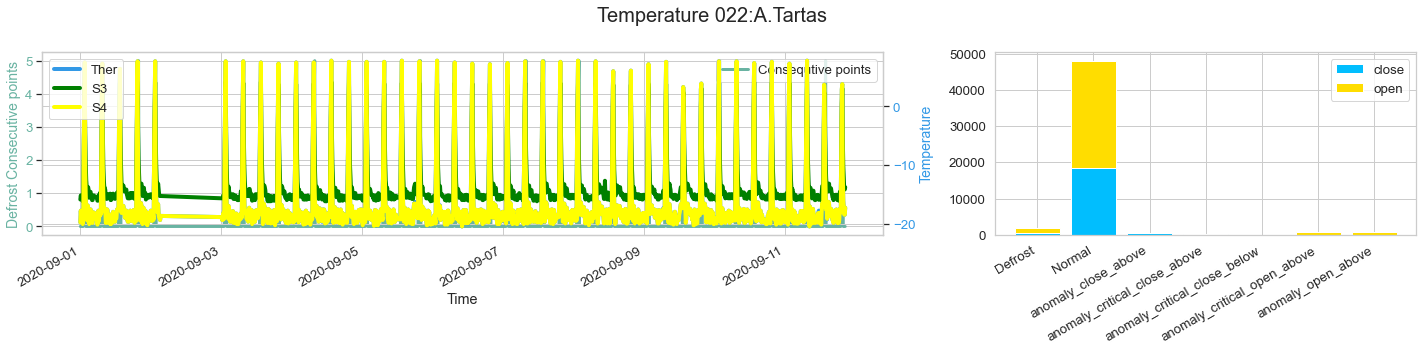

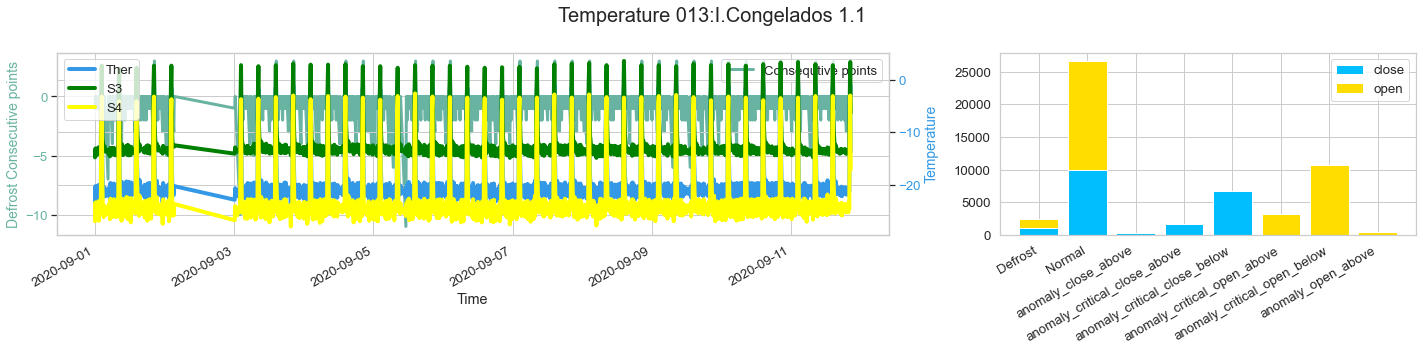

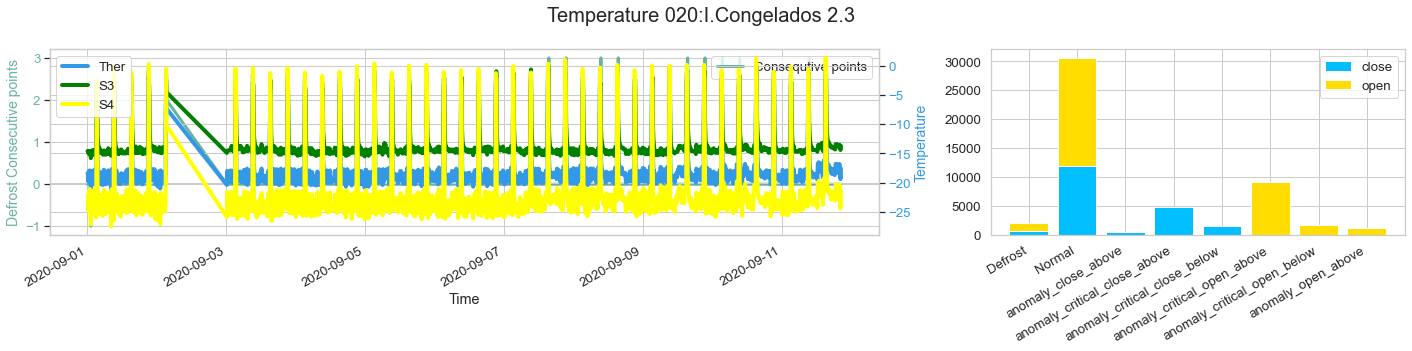

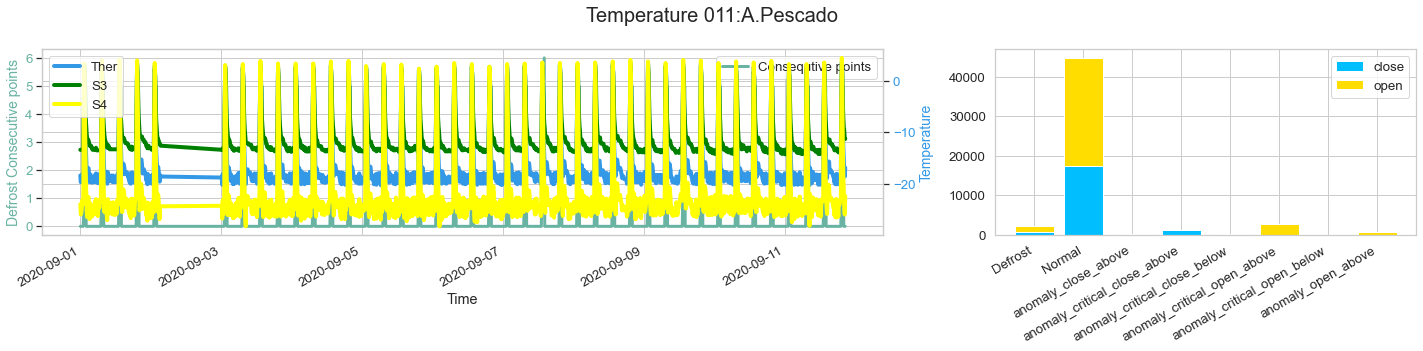

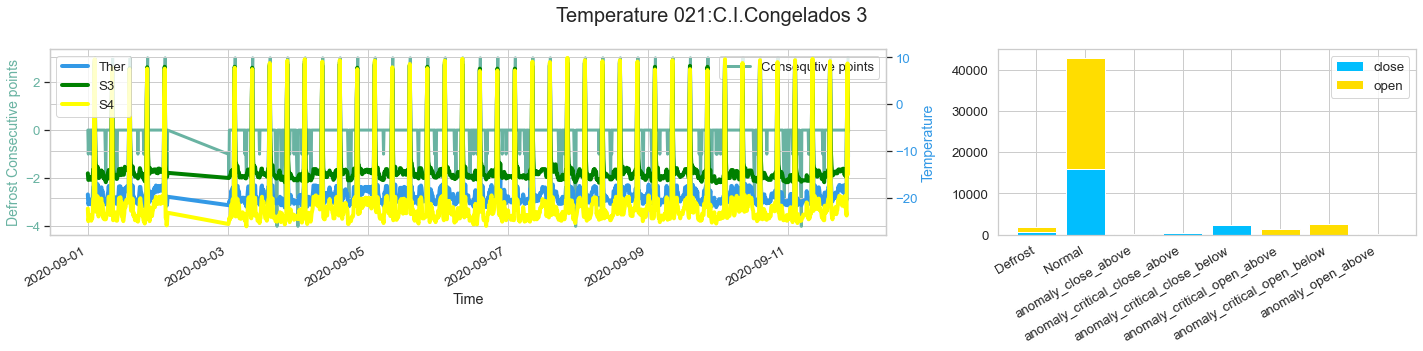

In [19]:
empty = []
for i in assets:
    
    
    df = data_merge[data_merge['AssetName']== i]
    defrost = df[['Timetag','Defrost']]
    point = df[['Timetag','AssetName','DataValue']]
    point = point.pivot_table('DataValue','Timetag','AssetName')
    point = myutils.missing_values.drop_columns(point,0.5)
    point = myutils.missing_values.fill_nans(point)

    test_merge = pd.merge(point,defrost, right_on='Timetag',left_index=True)#.set_index('Timetag')
    test_merge['hour'] = pd.to_datetime(test_merge['Timetag'].astype(str)).dt.hour
    test_merge['open/close'] = test_merge['Timetag'].dt.time.astype(str).apply(lambda x: 0 if x >= '22:00:00' or x <'07:00:00' else 1) #for class labels
    test_merge = test_merge.set_index('Timetag')
    test_merge['Consecutive'+ i] = test_merge['Defrost'] * (test_merge['Defrost'].groupby((test_merge['Defrost'] != test_merge['Defrost'].shift()).cumsum()).cumcount() + 1)
    test_merge['Status_'+i] = test_merge['Consecutive'+i].apply(lambda x: 'Defrost' if x>0 and x<=2 else ('Anomaly_Below' if x < 0 else ('Anomaly_Above' if x >2 else 'Normal') ))
   
    #get points that have identified as defrost but they should be anomalies
    defrost_begin = test_merge.loc[test_merge['Consecutive'+i]==1]
    # calculate the difference between the beginning of defrosts
    defrost_begin['diff'] =defrost_begin['hour'].diff().abs()
    # if difference is below 4 hours then it can be considered anomaly
    defrost_begin['Status_'+i].loc[defrost_begin['diff']<4]='Anomaly_Above' 
    #update the database with the new labels
    test_merge.drop('hour',axis=1,inplace=True)
    test_merge.update(defrost_begin)
    
    #add s3 & S4
    test_check = check_freezer[check_freezer['AssetName']==i].sort_values(ascending=True,by='Timetag')

    test_check= test_check[['Timetag','PointName','DataValue']]
    test_check = test_check.groupby(['Timetag','PointName'])['DataValue'].mean().unstack('PointName')
    #print(test_check.head)
    
    #fix this it's wrong for a couple of cases
    if test_check.shape[1] >= 2: #increase number if other parameter than S3 and S4 is added
        test_check['S4S3diff_'+i] = test_check.iloc[:,-1].abs()-test_check.iloc[:,-2].abs()
        test_check['S4S3_State_'+i] = test_check['S4S3diff_'+i].apply(lambda x: 0 if x<5 else 1) #for new class labels
        #print(test_check.head())
        
    


    #full dataset per asset
    check_freezer_merge = pd.merge(test_merge,test_check,right_on='Timetag',left_index=True)
    #print(check_freezer_merge.head())
    check_freezer_merge['Status_'+i]=check_freezer_merge.apply(classes,axis=1) #new class implementation
    check_freezer_merge.drop('Defrost',axis=1,inplace=True)
    check_freezer_merge = myutils.missing_values.drop_columns(check_freezer_merge,0.1)
    check_freezer_merge = myutils.missing_values.fill_nans(check_freezer_merge)
    #print(check_freezer_merge.shape)
    

    # #append dataframes to a final one
    empty.append(check_freezer_merge)
    
    #plot per asset
    COLOR_TEMPERATURE = "#69b3a2"
    COLOR_CONSECUTIVE = "#3399e6"

    fig, ax1 = plt.subplots(nrows=1,ncols=2,gridspec_kw={'width_ratios': [4, 2]},figsize=(20, 5))
    ax2 = ax1[0].twinx()
    #print(len(check_freezer_merge.columns))
    if len(check_freezer_merge.columns)==8:
        ax1[0].plot(check_freezer_merge.index.values[0:10*144],check_freezer_merge.iloc[0:10*144]['Consecutive'+i], color=COLOR_TEMPERATURE, lw=3,label ='Consequtive points')
        ax2.plot(check_freezer_merge.index.values[0:10*144],
                        check_freezer_merge.iloc[0:10*144].iloc[:,0], color=COLOR_CONSECUTIVE, lw=4,label='Ther')
        # ax2.plot(check_freezer_merge.index.values[0:1*144],
        #                 check_freezer_merge.iloc[0:1*144].iloc[:,1], color='Red', lw=4,label='Cut out')
        ax2.plot(check_freezer_merge.index.values[0:10*144],
                        check_freezer_merge.iloc[0:10*144].iloc[:,4], color='Green', lw=4, label='S3')
        ax2.plot(check_freezer_merge.index.values[0:10*144],
                        check_freezer_merge.iloc[0:10*144].iloc[:,5], color='Yellow', lw=4,label='S4')
        
        #measure =check_freezer_merge.iloc[:,2].value_counts()
        measure = check_freezer_merge.groupby(check_freezer_merge.iloc[:,3])['open/close'].value_counts().unstack().fillna(0)
        #axis.title.set_text("Point: {}".format(point))
        ax1[1].bar(measure.index,measure[0],label='close')
        ax1[1].bar(measure.index,measure[1],bottom=measure[0], label ='open')
        ax1[1].legend()
        ax1[1].set_xticklabels(measure.index,rotation=20)

        #ax1[1].bar(measure.keys(),height=measure)
        #ax1[1].set_xticklabels(measure.keys(),rotation=20)
            

    else:
        ax1[0].plot(check_freezer_merge.index.values[0:10*144],check_freezer_merge.iloc[0:10*144]['Consecutive'+i], color=COLOR_TEMPERATURE, lw=3,label='Consequtive points')
        ax2.plot(check_freezer_merge.index.values[0:10*144],
                        check_freezer_merge.iloc[0:10*144].iloc[:,0], color=COLOR_CONSECUTIVE, lw=4,label='Ther')
        # ax2.plot(check_freezer_merge.index.values[0:1*144],
        #                 check_freezer_merge.iloc[0:1*144].iloc[:,3], color='Red', lw=4,label='Cut out')
        # ax2.plot(check_freezer_merge.index.values[0:1*144],
        #                 check_freezer_merge.iloc[0:1*144].iloc[:,4], color='Green', lw=4, label ='S3')
        #measure =check_freezer_merge.iloc[:,2].value_counts()

        measure = check_freezer_merge.groupby(check_freezer_merge.iloc[:,3])['open/close'].value_counts().unstack().fillna(0)
        #axis.title.set_text("Point: {}".format(point))
        ax1[1].bar(measure.index,measure[0],label='close')
        ax1[1].bar(measure.index,measure[1],bottom=measure[0], label ='open')
        ax1[1].legend()
        ax1[1].set_xticklabels(measure.index,rotation=20)
        
            
       
        #ax1[1].bar(measure.keys(),height=measure)
        #ax1[1].set_xticklabels(measure.keys(),rotation=20)
    



    ax1[0].set_xlabel("Time")
    ax1[0].set_ylabel("Defrost Consecutive points", color=COLOR_TEMPERATURE, fontsize=14)
    ax1[0].tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)
    ax1[0].legend(loc='upper right')

    ax2.set_ylabel("Temperature", color=COLOR_CONSECUTIVE, fontsize=14)
    ax2.tick_params(axis="y", labelcolor=COLOR_CONSECUTIVE)
    ax2.legend(loc='upper left')

    fig.suptitle("Temperature "+ i, fontsize=20)

    
    
    fig.autofmt_xdate()
    fig.tight_layout()








In [68]:
final =pd.concat(empty,axis=1)

In [72]:
final.head()

010:C.Congelados  open/close  \
Timetag                                             
2020-09-01 00:00:00             -18.0         0.0   
2020-09-01 00:10:00              -9.0         0.0   
2020-09-01 00:20:00               1.9         0.0   
2020-09-01 00:30:00             -18.4         0.0   
2020-09-01 00:40:00             -19.1         0.0   

                     Consecutive010:C.Congelados Status_010:C.Congelados  \
Timetag                                                                    
2020-09-01 00:00:00                          0.0                  Normal   
2020-09-01 00:10:00                          1.0                 Defrost   
2020-09-01 00:20:00                          2.0                 Defrost   
2020-09-01 00:30:00                          0.0                  Normal   
2020-09-01 00:40:00                          0.0                  Normal   

                     C.Congelados:  u12 S3 Air Temp  019:I.Congelados 2.2  \
Timetag                                                                     
2020-09-01 00:00:00                           -18.0                 -20.0   
2020-09-01 00:10:00                            -8.9                 -20.0   
2020-09-01 00:20:00                             1.9                 -20.4   
2020-09-01 00:30:00                           -18.4                 -20.7   
2020-09-01 00:40:00                           -19.1                 -21.1   

                     open/close  Consecutive019:I.Congelados 2.2  \
Timetag                                                            
2020-09-01 00:00:00         0.0                              0.0   
2020-09-01 00:10:00         0.0                              0.0   
2020-09-01 00:20:00         0.0                              0.0   
2020-09-01 00:30:00         0.0                              0.0   
2020-09-01 00:40:00         0.0                             -1.0   

                    Status_019:I.Congelados 2.2  \
Timetag                                           
2020-09-01 00:00:00                      Normal   
2020-09-01 00:10:00                      Normal   
2020-09-01 00:20:00                      Normal   
2020-09-01 00:30:00                      Normal   
2020-09-01 00:40:00         anomaly_close_below   

                     I.Congelados 2.2:  u12 S3 Air Temp  ...  \
Timetag                                                  ...   
2020-09-01 00:00:00                               -12.2  ...   
2020-09-01 00:10:00                               -12.5  ...   
2020-09-01 00:20:00                               -12.5  ...   
2020-09-01 00:30:00                               -12.5  ...   
2020-09-01 00:40:00                               -12.5  ...   

                     Consecutive011:A.Pescado  Status_011:A.Pescado  \
Timetag                                                               
2020-09-01 00:00:00                       0.0                Normal   
2020-09-01 00:10:00                       0.0                Normal   
2020-09-01 00:20:00                       0.0                Normal   
2020-09-01 00:30:00                       0.0                Normal   
2020-09-01 00:40:00                       0.0                Normal   

                     A.Pescado:  u12 S3 Air Temp  A.Pescado:  u16 S4 Air Temp  \
Timetag                                                                         
2020-09-01 00:00:00                        -13.4                        -24.0   
2020-09-01 00:10:00                        -13.4                        -26.0   
2020-09-01 00:20:00                        -13.4                        -25.6   
2020-09-01 00:30:00                        -13.4                        -24.9   
2020-09-01 00:40:00                        -13.4                        -23.2   

                    021:C.I.Congelados 3  open/close  \
Timetag                                                
2020-09-01 00:00:00                -19.2         0.0   
2020-09-01 00:10:00                -21.3         0.0   
20

# Defrost Report

In [52]:
#get the defrost details
defrost_report = (final.loc[:,final.columns.str.contains('Consecutive')].reset_index().set_index(["Timetag"])
         .stack()
         .reset_index(name='Consecutive')
         .rename(columns={'level_2':'AssetName'}))

In [53]:
defrost_report = myutils.time_expand.time(defrost_report,'Timetag')

In [54]:
defrost_report_above = defrost_report[defrost_report['Consecutive']>2]
defrost_report_below = defrost_report[defrost_report['Consecutive']<0]
defrost_report_defrost = defrost_report[(defrost_report['Consecutive']>0) & (defrost_report['Consecutive']<=2)]
defrost_report_normal = defrost_report[defrost_report['Consecutive']==0]

In [55]:
report_below=defrost_report_below.groupby(['Date','level_1'])['Consecutive'].agg(max_below= 'max',total_below = 'sum',mean_below='mean').sort_values(ascending=False,by=['Date','total_below'])
report_above=defrost_report_above.groupby(['Date','level_1'])['Consecutive'].agg(max_above= 'max',total_above = 'sum',mean_above='mean').sort_values(ascending=False,by=['Date','total_above'])
report_defrost = defrost_report_defrost.groupby(['Date','level_1'])['Consecutive'].agg(max_defrost= 'max',total_defrost = 'sum',mean_defrost='mean').sort_values(ascending=False,by=['Date','total_defrost'])#.iloc[60:90]


In [56]:
final_report = pd.concat([report_below,report_above,report_defrost],axis=1)
final_report

max_below  total_below  mean_below  \
Date       level_1                                                              
2020-09-01 Consecutive057:M Charcuteria 1        NaN          NaN         NaN   
           Consecutive057:M Charcuteria 1        NaN          NaN         NaN   
           Consecutive058:M Charcuteria 2        NaN          NaN         NaN   
           Consecutive058:M Charcuteria 2        NaN          NaN         NaN   
           Consecutive059:M Quesos 1             NaN          NaN         NaN   
...                                              ...          ...         ...   
2021-08-30 Consecutive079:M Lacteos 2            NaN          NaN         NaN   
           Consecutive080:M Lacteos 3            NaN          NaN         NaN   
           Consecutive080:M Lacteos 3            NaN          NaN         NaN   
           Consecutive081:M Lacteos 4            NaN          NaN         NaN   
           Consecutive081:M Lacteos 4            NaN          NaN         NaN   

                                           max_above  total_above  mean_above  \
Date       level_1                                                              
2020-09-01 Consecutive057:M Charcuteria 1        3.0          3.0        3.00   
           Consecutive057:M Charcuteria 1        3.0          3.0        3.00   
           Consecutive058:M Charcuteria 2        4.0         14.0        3.50   
           Consecutive058:M Charcuteria 2        4.0         14.0        3.50   
           Consecutive059:M Quesos 1             3.0          6.0        3.00   
...                                              ...          ...         ...   
2021-08-30 Consecutive079:M Lacteos 2            4.0          7.0        3.50   
           Consecutive080:M Lacteos 3            3.0          9.0        3.00   
           Consecutive080:M Lacteos 3            3.0          9.0        3.00   
           Consecutive081:M Lacteos 4            4.0         13.0        3.25   
           Consecutive081:M Lacteos 4            4.0         13.0        3.25   

                                           max_defrost  total_defrost  \
Date       level_1                                                      
2020-09-01 Consecutive057:M Charcuteria 1          2.0            4.0   
           Consecutive057:M Charcuteria 1          2.0            4.0   
           Consecutive058:M Charcuteria 2          2.0            9.0   
           Consecutive058:M Charcuteria 2          2.0            9.0   
           Consecutive059:M Quesos 1               2.0            7.0   
...                                                ...            ...   
2021-08-30 Consecutive079:M Lacteos 2              2.0            9.0   
           Consecutive080:M Lacteos 3              2.0            9.0   
           Consecutive080:M Lacteos 3              2.0            9.0   
           Consecutive081:M Lacteos 4              2.0            9.0   
           Consecutive081:M Lacteos 4              2.0            9.0   

                                           mean_defrost  
Date       level_1                                       
2020-09-01 Consecutive057:M Charcuteria 1      1.333333  
           Consecutive057:M Charcuteria 1      1.333333  
           Consecutive058:M Charcuteria 2      1.500000  
           Consecutive058:M Charcuteria 2      1.500000  
           Consecutive059:M Quesos 1           1.400000  
...                                                 ...  
2021-08-30 Consecutive079:M Lacteos 2          1.500000  
           Consecutive080:M Lacteos 3          1.500000  
           Consecutive080:M Lacteos 3          1.500000  
           Consecutive081:M Lacteos 4          1.500000  
           Consecutive081:M Lacteos 4          1.500000  

[5566 rows x 9 columns]

In [57]:
final_report.reset_index().sort_values(ascending=False,by='mean_above').drop_duplicates()

Date                          level_1  max_below  total_below  \
130  2020-09-05   Consecutive057:M Charcuteria 1        NaN          NaN   
96   2020-09-04   Consecutive057:M Charcuteria 1        NaN          NaN   
1160 2020-11-09  Consecutive061:SM Charcuteria 1        NaN          NaN   
783  2020-10-10       Consecutive065:SM Quesos 3        NaN          NaN   
128  2020-09-04       Consecutive081:M Lacteos 4        NaN          NaN   
...         ...                              ...        ...          ...   
5551 2021-08-30   Consecutive063:CSM Charcuteria        NaN          NaN   
5552 2021-08-30       Consecutive065:SM Quesos 3        NaN          NaN   
5553 2021-08-30           Consecutive066:CSM PLS       -1.0         -1.0   
5555 2021-08-30            Consecutive067:SM PLS       -1.0        -25.0   
5559 2021-08-30       Consecutive078:M Lacteos 1        NaN          NaN   

      mean_below  max_above  total_above  mean_above  max_defrost  \
130          NaN      140.0       8286.0   95.241379          2.0   
96           NaN       56.0       1596.0   29.018182          2.0   
1160         NaN       47.0       1099.0   26.804878          2.0   
783          NaN       48.0       1165.0   25.888889          2.0   
128          NaN       50.0       1309.0   22.964912          2.0   
...          ...        ...          ...         ...          ...   
5551         NaN        NaN          NaN         NaN          1.0   
5552         NaN        NaN          NaN         NaN          1.0   
5553   -1.000000        NaN          NaN         NaN          2.0   
5555   -1.041667        NaN          NaN         NaN          2.0   
5559         NaN        NaN          NaN         NaN          1.0   

      total_defrost  mean_defrost  
130             3.0      1.500000  
96              6.0      1.500000  
1160            3.0      1.500000  
783             6.0      1.500000  
128            12.0      1.500000  
...             ...           ...  
5551            1.0      1.000000  
5552            1.0      1.000000  
5553            4.0      1.333333  
5555            3.0      1.500000  
5559            3.0      1.000000  

[4077 rows x 11 columns]

In [ ]:
final_report.to_csv('Data\Processed\Defrost_report.csv')

# Differential report

In [24]:
differential_report = (final.loc[:,final.columns.str.contains('S4S3diff')].reset_index().set_index(["Timetag"])
         .stack()
         .reset_index(name='S3S4')
         .rename(columns={'level_2':'AssetName'}))

In [25]:
if len(differential_report)==0:
    print( 'No differential report can be made')
else:
    print('Continue to report')

No differential report can be made


In [ ]:
# differential_report = myutils.time_expand.time(differential_report,'Timetag')

In [ ]:
# differential_report.groupby(['Date','level_1'])['S3S4'].agg(max_diff= 'max',min_diff='min',mean_diff='mean').sort_values(ascending=False,by=['Date','max_diff'])

In [73]:
final.drop(['open/close'],axis=1,inplace=True)

In [ ]:
#final.to_csv('final_test.csv')

In [74]:
final.shape

(51986, 64)

In [75]:
status = [i for i in final.columns if i.startswith('Status')]

In [76]:
status

['Status_010:C.Congelados',
 'Status_019:I.Congelados 2.2',
 'Status_014:I.Congelados 1.2',
 'Status_017:C.I.Congelados 4',
 'Status_016:C.I.Congelados 2',
 'Status_012:C.Pan Congelado',
 'Status_015:I.Congelados 1.3',
 'Status_018:I.Congelados 2.1',
 'Status_022:A.Tartas',
 'Status_013:I.Congelados 1.1',
 'Status_020:I.Congelados 2.3',
 'Status_011:A.Pescado',
 'Status_021:C.I.Congelados 3']

In [92]:
empty[0]['010:C.Congelados']

Timetag
2020-09-01 00:00:00   -18.0
2020-09-01 00:10:00    -9.0
2020-09-01 00:20:00     1.9
2020-09-01 00:30:00   -18.4
2020-09-01 00:40:00   -19.1
                       ... 
2021-08-30 23:20:00   -18.4
2021-08-30 23:30:00   -19.5
2021-08-30 23:40:00   -18.9
2021-08-30 23:50:00   -18.9
2021-08-31 00:00:00   -18.9
Name: 010:C.Congelados, Length: 51986, dtype: float64

In [49]:

classes = {'Normal':0,
            'Defrost':1,
            'anomaly_critical_open_below' :2,  
            'anomaly_critical_close_below':3, 
            'anomaly_open_below':4,               
            'anomaly_close_below':5,    

            'anomaly_critical_open_above':6,     
            'anomaly_critical_close_above':7,                  
            'anomaly_open_above':8,               
            'anomaly_close_above':9
                 }
for i in range(len(empty)):
    #empty[i].drop(['open/close'],axis=1,inplace=True)
    status = [j for j in empty[i].columns if j.startswith('Status')]
    empty[i][status[0]] = empty[i][status[0]].replace(classes)
    counts=empty[i][status[0]].value_counts()
    empty[i] = empty[i][~empty[i][status[0]].isin(counts[counts < 2].index)]
    


In [99]:
len(empty)

13

In [100]:
len(assets)

13

In [21]:
test = []
train = []
for i, j in enumerate(assets):
    dataset = empty[i].loc[:,empty[i].columns[empty[i].columns.str.contains(assets[i])]]

    dataset = dataset.reset_index()
    dataset['Timetag'] = pd.to_datetime(dataset['Timetag'])#same with the issue


    #Applying vectorization to get numerical date features
    dataset['year'] = (dataset['Timetag']).dt.year
    dataset['weekday'] = (dataset['Timetag']).dt.weekday  # Define what the numbers of the weekday are
    dataset['month'] = (dataset['Timetag']).dt.month
    dataset['weekofyear'] =(dataset['Timetag']).dt.weekofyear
    dataset['quarter'] =(dataset['Timetag']).dt.quarter
    dataset['hour'] =(dataset['Timetag']).dt.hour
    dataset['minute'] =(dataset['Timetag']).dt.minute
    dataset = dataset.assign(Hour_of_week = lambda x: x.Timetag.map(lambda y: y.dayofweek)*24+x.hour)
    dataset['open/close'] = dataset['Timetag'].dt.time.astype(str).apply(lambda x: 0 if x >= '22:00:00' or x <'07:00:00' else 1)
    #dataset= dataset.set_index('Timetag')
    #print('dataset after',dataset.head())

    #final train
    final_train = dataset[dataset['Timetag']<='2021-07-31']
    final_train = final_train.set_index('Timetag')
    
    #final test
    final_test= dataset[dataset['Timetag']>='2021-08-01']
    final_test = final_test.set_index('Timetag')

    test.append(final_test)
    train.append(final_train)

In [25]:
train[0].loc[:,train[0].columns[train[0].columns.str.contains('Status')]].value_counts()

Status_010:C.Congelados
0                          41059
8                           3213
1                           2471
9                            703
5                             56
4                             26
dtype: int64

# Alarms exploration

In [28]:
#alarms = pd.read_csv('Data\Processed\\freezer_alarms.csv')

alarms = Alarms.alarms(1229,'freezer','Data\Processed\89247_freezer_Final.csv','Data\Processed\89247_freezer_assets.csv',type='--- High Temp.')

In [29]:
alarms

AssetName        reportedtime      ReasonText  002:C CONGELADOS  \
0         2020-07-16 14:05:54  --- High Temp.               0.0   
1         2020-07-16 14:10:40  --- High Temp.               0.0   
2         2020-07-16 15:21:17  --- High Temp.               0.0   
3         2020-07-16 15:59:42  --- High Temp.               0.0   
4         2020-07-16 19:54:10  --- High Temp.               0.0   
..                        ...             ...               ...   
600       2021-07-29 13:27:49  --- High Temp.               4.0   
601       2021-08-21 12:19:29  --- High Temp.               4.0   
602       2021-08-23 11:34:29  --- High Temp.               4.0   
603       2021-08-28 11:25:56  --- High Temp.               4.0   
604       2021-08-28 13:27:31  --- High Temp.               4.0   

AssetName  011:CB CONG Hielo  012:I CONG PLS  013:I CONG Carne  \
0                        0.0             0.0               0.0   
1                        0.0             0.0               0.0   
2                        0.0             0.0               0.0   
3                        0.0             0.0               0.0   
4                        0.0             0.0               0.0   
..                       ...             ...               ...   
600                      0.0             0.0               0.0   
601                      0.0             0.0               0.0   
602                      0.0             0.0               0.0   
603                      0.0             0.0               0.0   
604                      0.0             0.0               0.0   

AssetName  014:CB CONG Ave  015:I CONG Helado  016:CB CONG PLS  \
0                      5.0                0.0              0.0   
1                      0.0                0.0              0.0   
2                      0.0                0.0              5.0   
3                      5.0                0.0              0.0   
4                      0.0                0.0              5.0   
..                     ...                ...              ...   
600                    0.0                0.0              0.0   
601                    0.0                0.0              0.0   
602                    0.0                0.0              0.0   
603                    0.0                0.0              0.0   
604                    0.0                0.0              0.0   

AssetName  017:I CONG PLS 2  018:I CONG Verdura  
0                       0.0                 0.0  
1                       5.0                 0.0  
2                       0.0                 0.0  
3                       0.0                 0.0  
4                       0.0                 0.0  
..                      ...                 ...  
600                     0.0                 0.0  
601                     0.0                 0.0  
602                     0.0                 0.0  
603                     0.0                 0.0  
604                     0.0                 0.0  

[605 rows x 11 columns]

In [30]:
alarms= alarms[(alarms['reportedtime']>='2020-09-01')&(alarms['ReasonText']=='--- High Temp.')]

In [ ]:
#alarms.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
test_assets = set(assets).difference(set(alarms.columns[2:]))

print("Difference of first and second String: " + str(test_assets))
if not test_assets:
    print("First and Second list are Equal")
# if lists are not equal    
else:
    print("First and Second list are Not Equal")
    assets = [x for x in alarms.columns[2:] if x in assets]
    status = [j for i in assets for j in status if i in j]
    



Difference of first and second String: {'023:I CONG Pescaderia', '019:CB CONG Pescado'}
First and Second list are Not Equal


In [32]:
empty_alarms=[]
for i in assets:
    
    dummie_alarms = alarms[[ 'ReasonText','reportedtime', i]]
    dummie_alarms['reportedtime'] =pd.to_datetime(dummie_alarms['reportedtime'])
    
    dummie_final = final[i].reset_index()
    test = pd.merge_asof(dummie_alarms,dummie_final,right_on='Timetag',left_on='reportedtime',allow_exact_matches=True,direction='nearest')
    test = test.loc[test[i+'_x']>=1]
    test_alarms = test[['Timetag',i+'_y']].set_index('Timetag')
    #test_alarms = test[['ReasonText','Timetag',i+'_y']].set_index('Timetag')

    empty_alarms.append(test_alarms)
   


In [ ]:
import joblib
#joblib.dump(empty_alarms,'empty_alarms.pkl')
    

['empty_alarms.pkl']

In [33]:
assert len(empty_alarms[0])>0,'Empty dataframe'

# Further exploration on time and frequency

In [34]:
explore = final.reset_index()

In [35]:
#create additional column with 0 when store is closed and 1 when is open
explore['open/close'] = explore['Timetag'].dt.time.astype(str).apply(lambda x: 0 if x >= '22:00:00' or x <'07:00:00' else 1)

In [ ]:
#explore.to_csv('Data\Processed\Explore.csv')

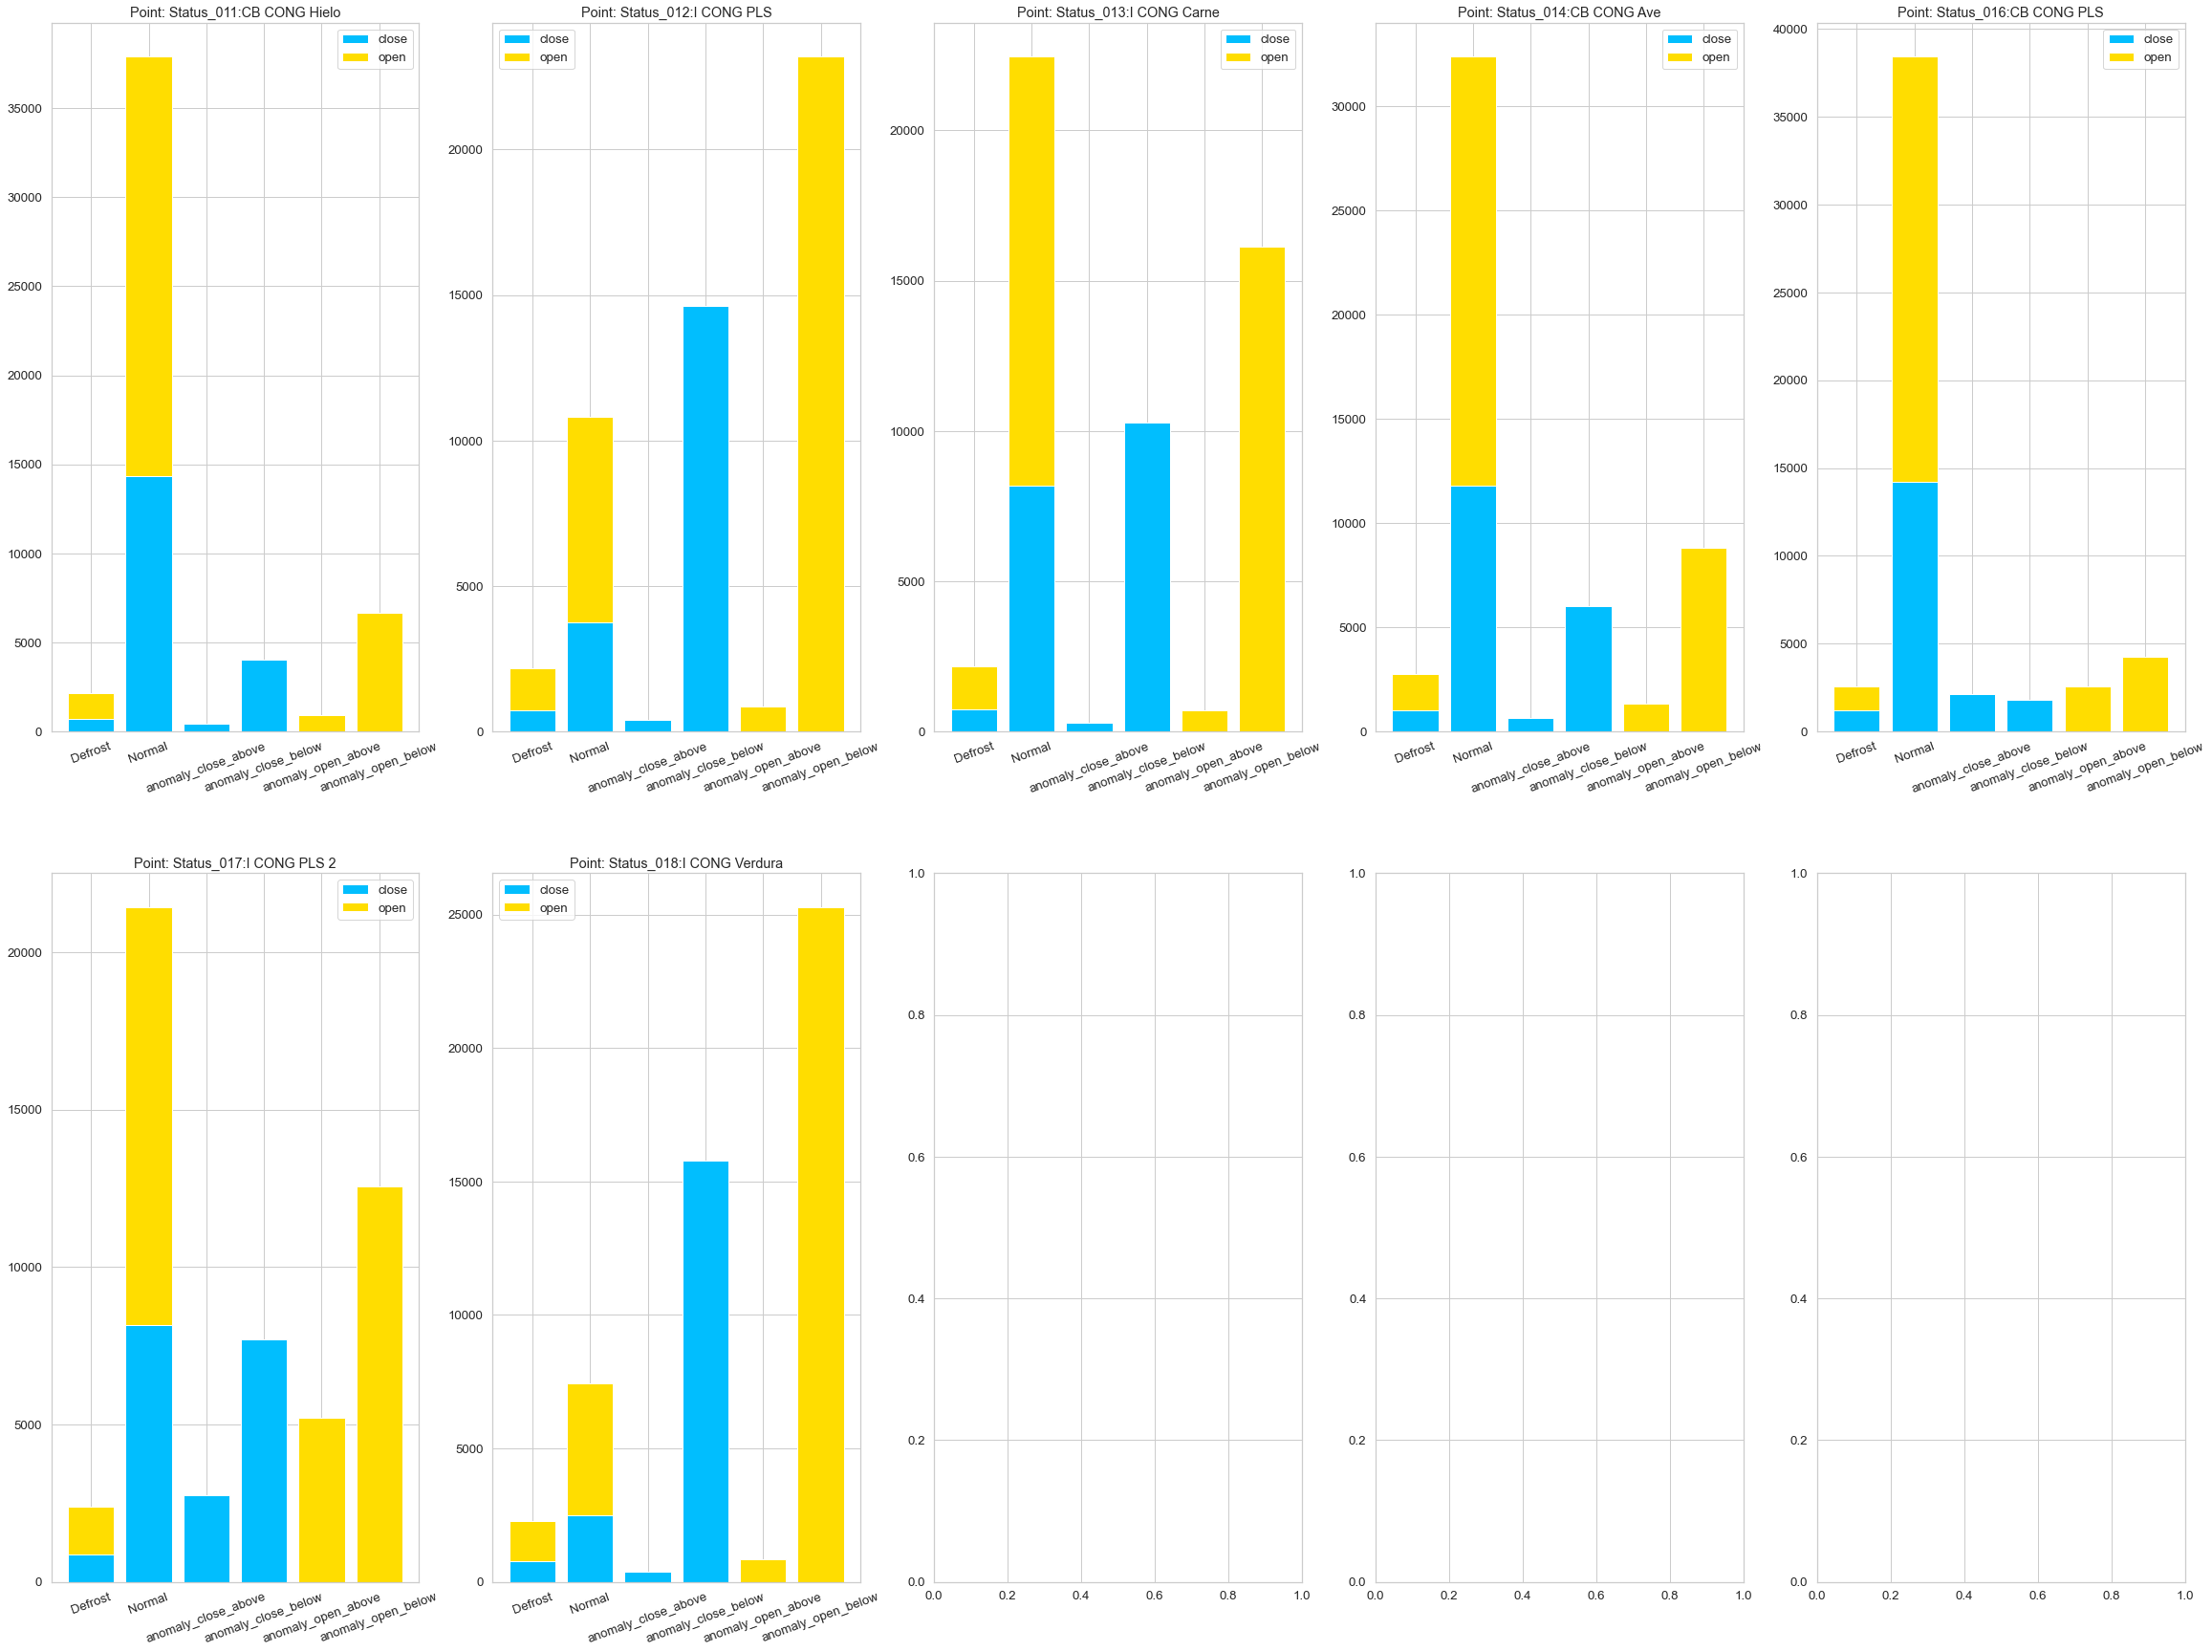

In [36]:
ncols = 5
nrows = int(len(status)/ncols)+1

f,ax = plt.subplots(nrows,ncols,sharex=False)
f.set_figheight(30)
f.set_figwidth(40)
        

for i , point in enumerate(status):
    axis = ax[i//ncols,i%ncols]
    
    measure = explore.groupby(explore[point])['open/close'].value_counts().unstack().fillna(0)
            
    
    axis.title.set_text("Point: {}".format(point))
    axis.bar(measure.index,measure[0],label='close')
    axis.bar(measure.index,measure[1],bottom=measure[0], label ='open')
    axis.legend()
    axis.set_xticklabels(measure.index,rotation=20)

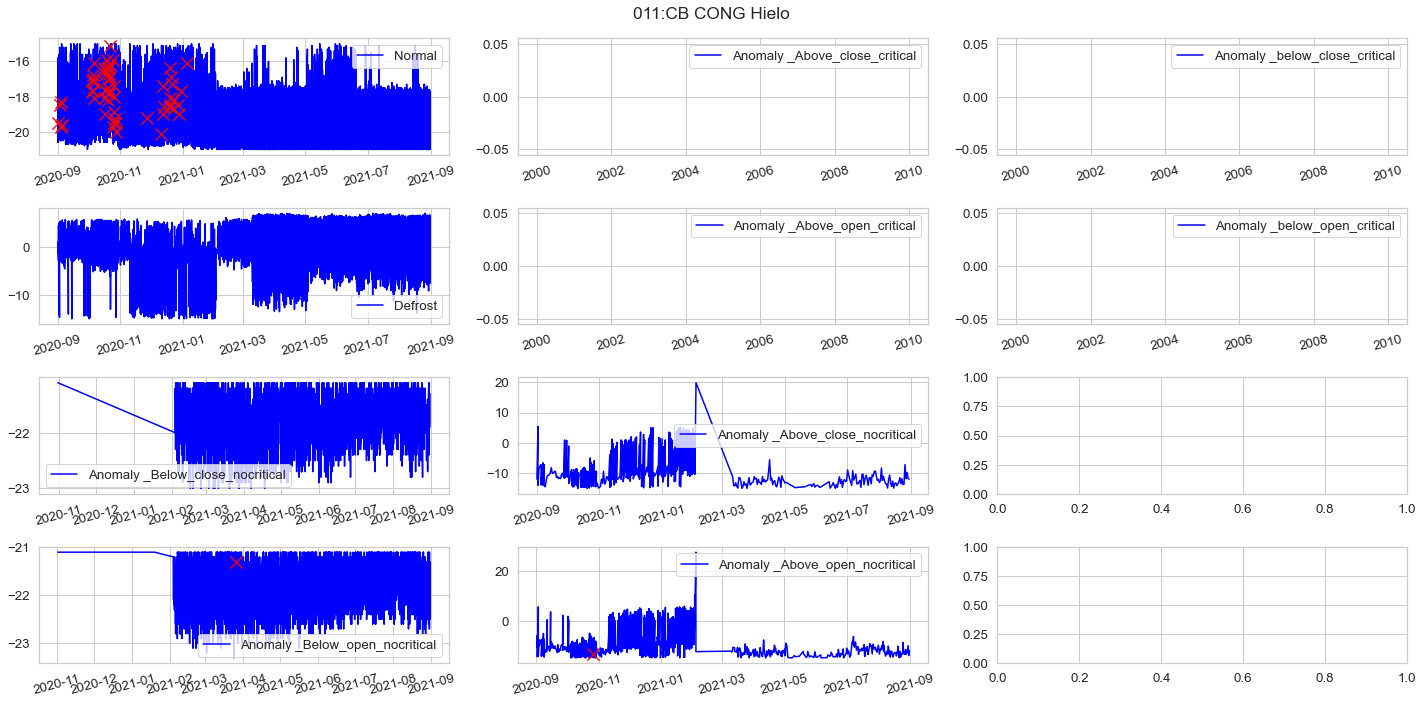

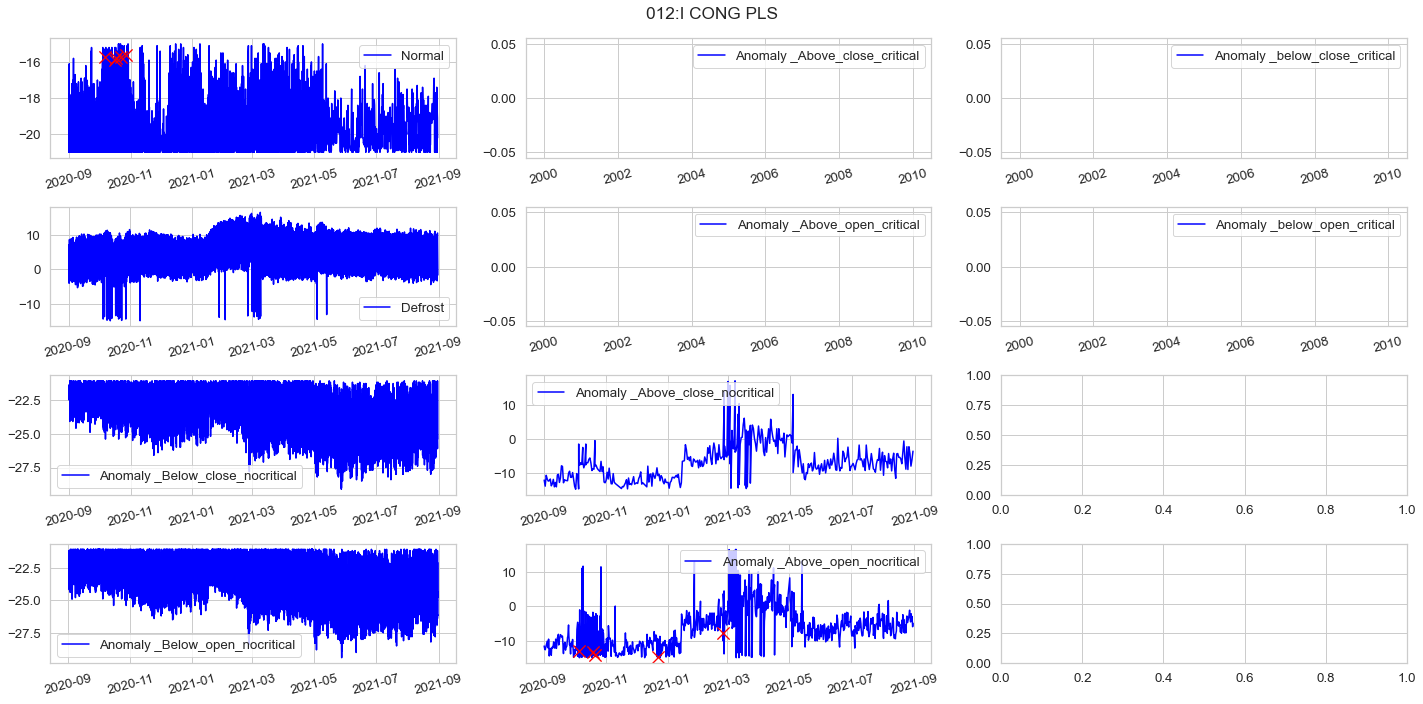

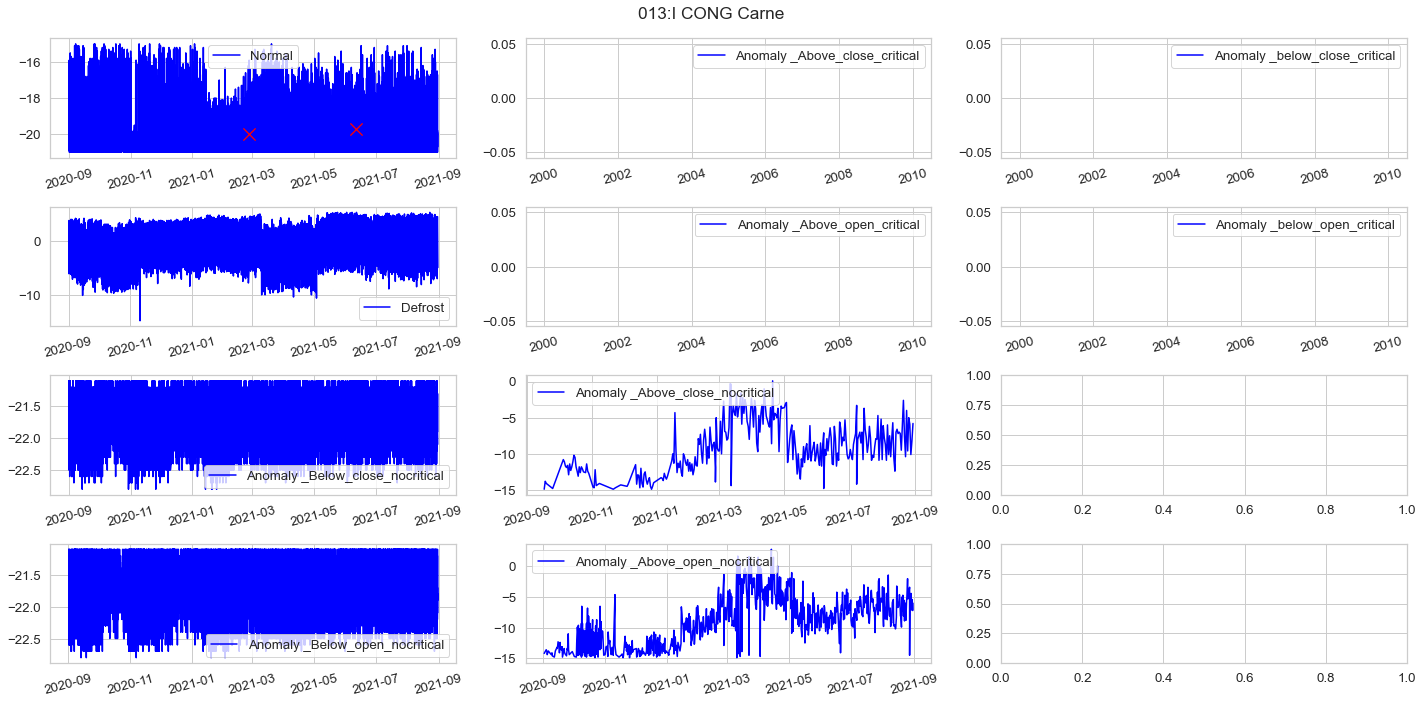

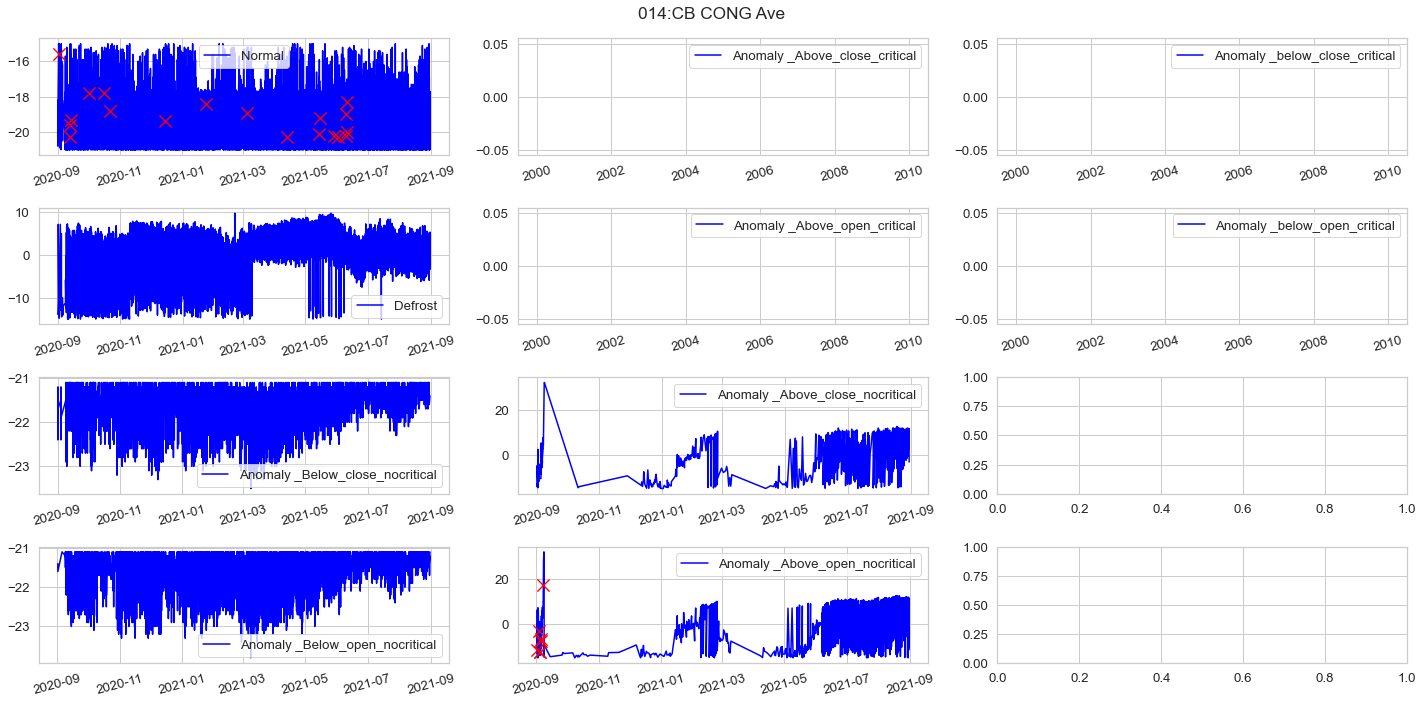

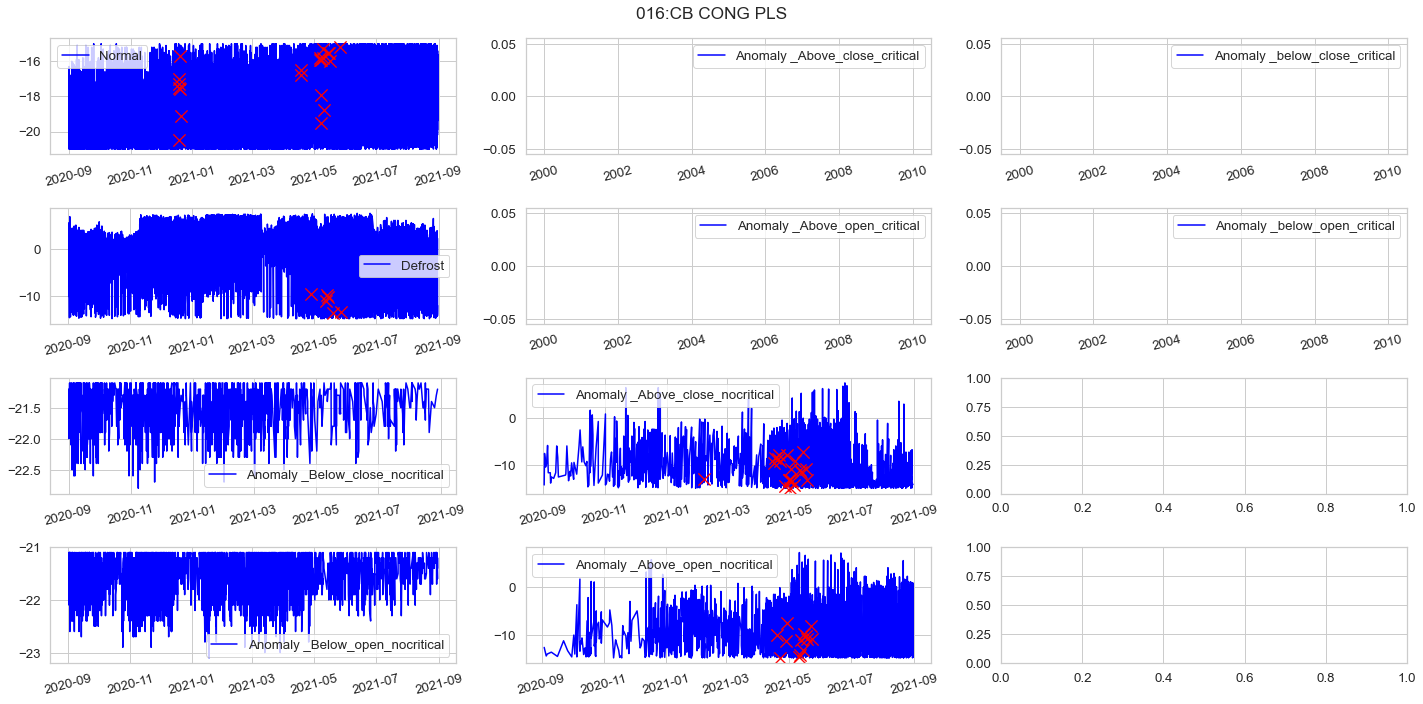

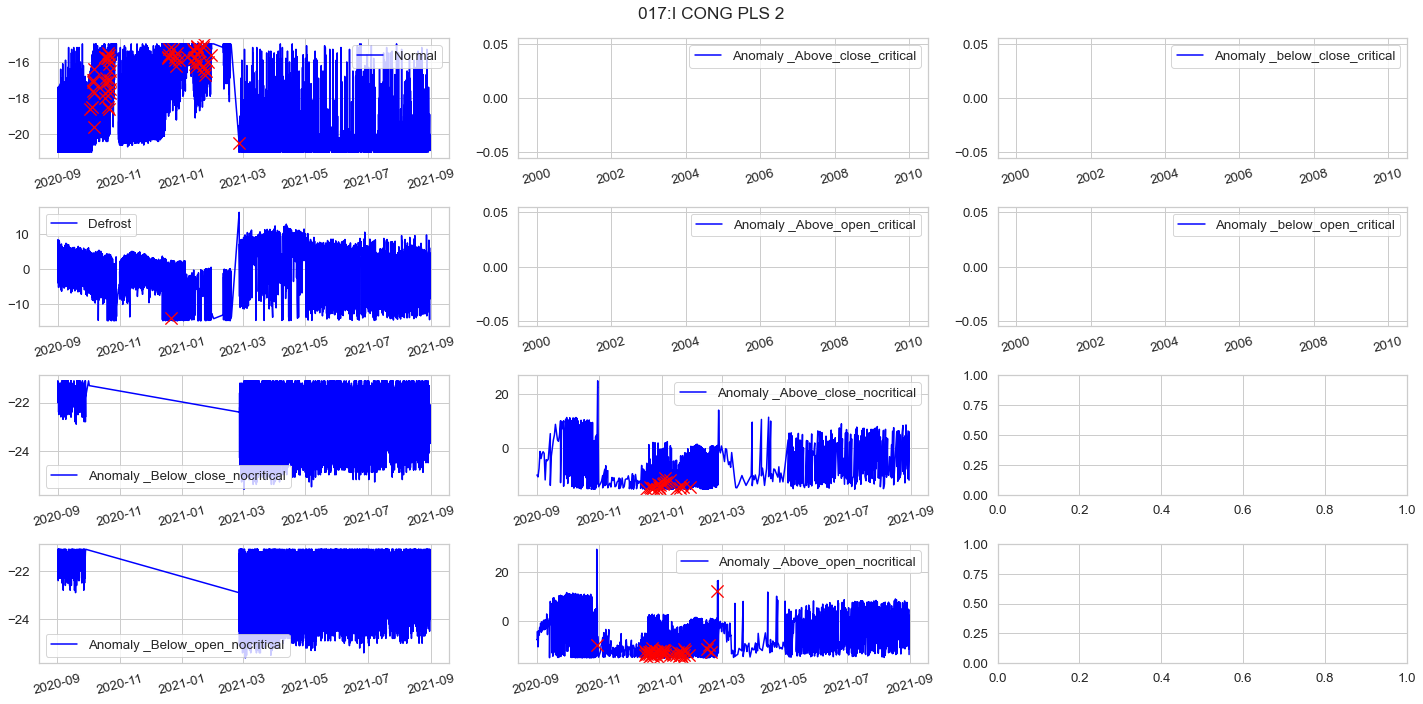

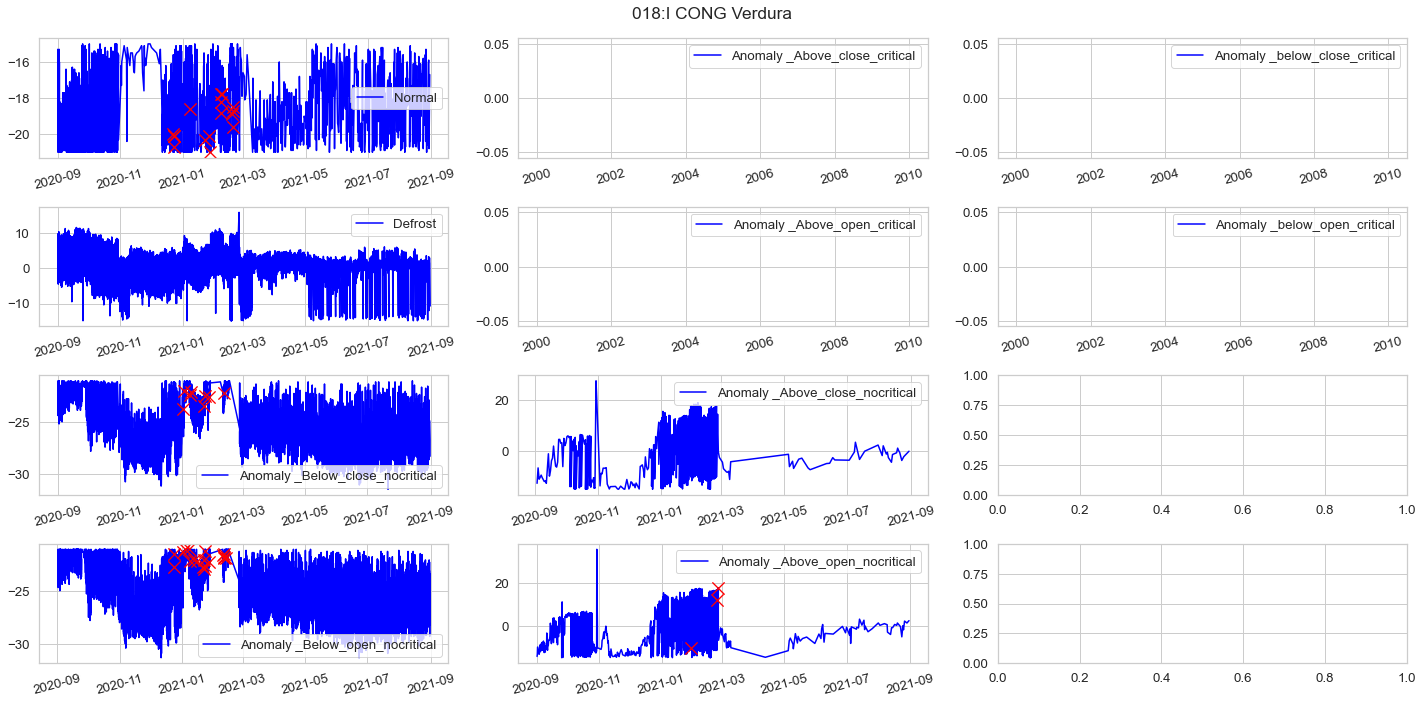

In [37]:
#plot the classes through time
for k,i in enumerate(status):
    # df_above = explore.loc[explore[i]=='Anomaly_Above'].set_index('Timetag') #initial classes
    # df_below = explore.loc[explore[i]=='Anomaly_Below'].set_index('Timetag') #initial classes
    df_defrost = explore.loc[explore[i]=='Defrost'].set_index('Timetag') #intitial classes
    df_normal = explore.loc[explore[i]=='Normal'].set_index('Timetag') #intial classes

    #if more classes
    df_above_close_nocritical = explore.loc[explore[i]=='anomaly_close_above'].set_index('Timetag')
    df_above_open_nocritical = explore.loc[explore[i]=='anomaly_open_above'].set_index('Timetag')
    df_above_close_critical = explore.loc[explore[i]=='anomaly_critical_close_above'].set_index('Timetag')
    df_above_open_critical = explore.loc[explore[i]=='anomaly_critical_open_above'].set_index('Timetag')

    df_below_close_nocritical = explore.loc[explore[i]=='anomaly_close_below'].set_index('Timetag')
    df_below_open_nocritical = explore.loc[explore[i]=='anomaly_open_below'].set_index('Timetag')
    df_below_close_critical = explore.loc[explore[i]=='anomaly_critical_close_below'].set_index('Timetag')
    df_below_open_critical = explore.loc[explore[i]=='anomaly_critical_open_below'].set_index('Timetag')
    
   
    #get asset's temperature
    # df1 = df_above[assets[k]] #intial classes
    # df2 = df_below[assets[k]] #intial classes
    df3 = df_defrost[assets[k]] #intial classes
    df4 = df_normal[assets[k]] #intial classes

    #if more classes
    df5 = df_above_close_nocritical[assets[k]]
    df6 = df_above_open_nocritical[assets[k]]
    df7 = df_above_close_critical[assets[k]]
    df8 = df_above_open_critical[assets[k]]
    df9 = df_below_close_nocritical[assets[k]]
    df10 = df_below_open_nocritical[assets[k]]
    df11 = df_below_close_critical[assets[k]]
    df12 = df_below_open_critical[assets[k]]

    #get the alarms for each status

    # status_alarms_above = pd.merge(df1,empty_alarms[k],right_index=True,left_index=True) #intial classes
    # status_alarms_below = pd.merge(df2,empty_alarms[k],right_index=True,left_index=True) #intial classes
    status_alarms_defrost = pd.merge(df3,empty_alarms[k],right_index=True,left_index=True) #intial classes
    status_alarms_normal = pd.merge(df4,empty_alarms[k],right_index=True,left_index=True) #intial classes


    status_alarms_above_close_nocritical = pd.merge(df5,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_above_open_nocritical = pd.merge(df6,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_above_close_critical = pd.merge(df7,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_above_open_critical = pd.merge(df8,empty_alarms[k],right_index=True,left_index=True)

    status_alarms_below_close_nocritical = pd.merge(df9,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_below_open_nocritical = pd.merge(df10,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_below_close_critical = pd.merge(df11,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_below_open_critical = pd.merge(df12,empty_alarms[k],right_index=True,left_index=True)



    fig,ax = plt.subplots(4,3,figsize=(20,10))
    # ax[0,0].plot(df1.index.values,df1, color='blue',label='Anomaly _Above')#initial classes
    # ax[1,0].plot(df2.index.values,df2, color='blue',label='Anomaly _Below')#initial classes
    ax[0,0].plot(df4.index.values,df4, color='blue',label='Normal') #initial classes
    ax[1,0].plot(df3.index.values,df3, color='blue',label='Defrost')#initial classes
    ax[2,0].plot(df9.index.values,df9, color='blue',label='Anomaly _Below_close_nocritical')
    ax[3,0].plot(df10.index.values,df10, color='blue',label='Anomaly _Below_open_nocritical')

    ax[0,1].plot(df7.index.values,df7, color='blue',label='Anomaly _Above_close_critical')
    ax[1,1].plot(df8.index.values,df8, color='blue',label='Anomaly _Above_open_critical')
    ax[2,1].plot(df5.index.values,df5, color='blue',label='Anomaly _Above_close_nocritical')
    ax[3,1].plot(df6.index.values,df6, color='blue',label='Anomaly _Above_open_nocritical')
    
    ax[0,2].plot(df11.index.values,df11, color='blue',label='Anomaly _below_close_critical')
    ax[1,2].plot(df12.index.values,df12, color='blue',label='Anomaly _below_open_critical')



    

    # ax[0,0].plot(status_alarms_above,linestyle='none', marker='x', color='red', markersize=12)#initial classes
    # ax[1,0].plot(status_alarms_below,linestyle='none', marker='x', color='red', markersize=12) #initial classes
    ax[0,0].plot(status_alarms_normal,linestyle='none', marker='x', color='red', markersize=12)#initial classes
    ax[1,0].plot(status_alarms_defrost,linestyle='none', marker='x', color='red', markersize=12)#initial classes
    ax[2,0].plot(status_alarms_below_close_nocritical, linestyle='none', marker='x', color='red', markersize=12)
    ax[3,0].plot(status_alarms_below_open_nocritical, linestyle='none', marker='x', color='red', markersize=12)

    ax[0,1].plot(status_alarms_above_close_critical, linestyle='none', marker='x', color='red', markersize=12)
    ax[1,1].plot(status_alarms_above_open_critical, linestyle='none', marker='x', color='red', markersize=12)
    ax[2,1].plot(status_alarms_above_close_nocritical, linestyle='none', marker='x', color='red', markersize=12)
    ax[3,1].plot(status_alarms_above_open_nocritical, linestyle='none', marker='x', color='red', markersize=12)
    
    ax[0,2].plot(status_alarms_below_close_critical, linestyle='none', marker='x', color='red', markersize=12)
    ax[1,2].plot(status_alarms_below_open_critical, linestyle='none', marker='x', color='red', markersize=12)

    ax[0,0].legend(loc='best')#initial class
    ax[1,0].legend(loc='best')#initial class
    ax[2,0].legend(loc='best')
    ax[3,0].legend(loc='best')

    ax[0,1].legend(loc='best')#initial class
    ax[1,1].legend(loc='best')#initial class
    ax[2,1].legend(loc='best')
    ax[3,1].legend(loc='best')

    ax[0,2].legend(loc='best')
    ax[1,2].legend(loc='best')
    # ax[2,2].legend(loc='best')    
    # ax[3,2].legend(loc='best')
    
    

    ax[0,0].tick_params(axis='x',labelrotation=15)#initial class
    ax[1,0].tick_params(axis='x',labelrotation=15)#initial class
    ax[2,0].tick_params(axis='x',labelrotation=15)
    ax[3,0].tick_params(axis='x',labelrotation=15)

    ax[0,1].tick_params(axis='x',labelrotation=15)#initial class
    ax[1,1].tick_params(axis='x',labelrotation=15)#initial class
    ax[2,1].tick_params(axis='x',labelrotation=15)
    ax[3,1].tick_params(axis='x',labelrotation=15)

    ax[0,2].tick_params(axis='x',labelrotation=15)
    ax[1,2].tick_params(axis='x',labelrotation=15)
    # ax[2,2].tick_params(axis='x',labelrotation=15)
    # ax[3,2].tick_params(axis='x',labelrotation=15)
    
    
    
    fig.suptitle(assets[k])
    
    fig.tight_layout()
    plt.show()


# Create train dataset

In [ ]:
# train_dummies=(pd.get_dummies(
#     pd.DataFrame(final[status[0]].tolist()), prefix=status[0], prefix_sep='_').groupby(level=0, axis=1).sum())

In [ ]:
# train = pd.merge(final.reset_index(),train_dummies,left_index=True,right_index=True)

In [29]:
# classes = {'Normal':0,
#             'Anomaly_Above':1,
#             'Anomaly_Below':2,
#             'Defrost':3}

classes = {'Normal':0,
            'Defrost':1,
            'anomaly_critical_open_below' :2,  
            'anomaly_critical_close_below':3, 
            'anomaly_open_below':4,               
            'anomaly_close_below':5,    

            'anomaly_critical_open_above':6,     
            'anomaly_critical_close_above':7,                  
            'anomaly_open_above':8,               
            'anomaly_close_above':9
                 }

In [30]:
for i in status:
    final[i] = final[i].replace(classes)

In [31]:
final.head()

010:C.Congelados  Consecutive010:C.Congelados  \
Timetag                                                              
2020-09-01 00:00:00             -18.0                          0.0   
2020-09-01 00:10:00              -9.0                          1.0   
2020-09-01 00:20:00               1.9                          2.0   
2020-09-01 00:30:00             -18.4                          0.0   
2020-09-01 00:40:00             -19.1                          0.0   

                     Status_010:C.Congelados  C.Congelados:  u12 S3 Air Temp  \
Timetag                                                                        
2020-09-01 00:00:00                        0                           -18.0   
2020-09-01 00:10:00                        1                            -8.9   
2020-09-01 00:20:00                        1                             1.9   
2020-09-01 00:30:00                        0                           -18.4   
2020-09-01 00:40:00                        0                           -19.1   

                     019:I.Congelados 2.2  Consecutive019:I.Congelados 2.2  \
Timetag                                                                      
2020-09-01 00:00:00                 -20.0                              0.0   
2020-09-01 00:10:00                 -20.0                              0.0   
2020-09-01 00:20:00                 -20.4                              0.0   
2020-09-01 00:30:00                 -20.7                              0.0   
2020-09-01 00:40:00                 -21.1                             -1.0   

                     Status_019:I.Congelados 2.2  \
Timetag                                            
2020-09-01 00:00:00                          0.0   
2020-09-01 00:10:00                          0.0   
2020-09-01 00:20:00                          0.0   
2020-09-01 00:30:00                          0.0   
2020-09-01 00:40:00                          5.0   

                     I.Congelados 2.2:  u12 S3 Air Temp  \
Timetag                                                   
2020-09-01 00:00:00                               -12.2   
2020-09-01 00:10:00                               -12.5   
2020-09-01 00:20:00                               -12.5   
2020-09-01 00:30:00                               -12.5   
2020-09-01 00:40:00                               -12.5   

                     I.Congelados 2.2:  u16 S4 Air Temp  014:I.Congelados 1.2  \
Timetag                                                                         
2020-09-01 00:00:00                               -23.3                 -23.3   
2020-09-01 00:10:00                               -23.3                 -23.0   
2020-09-01 00:20:00                               -23.7                 -22.5   
2020-09-01 00:30:00                               -24.3                 -22.5   
2020-09-01 00:40:00                               -24.8                 -22.5   

                     ...  011:A.Pescado  Consecutive011:A.Pescado  \
Timetag              ...                                            
2020-09-01 00:00:00  ...          -18.4                       0.0   
2020-09-01 00:10:00  ...          -19.7                       0.0   
2020-09-01 00:20:00  ...          -19.7                       0.0   
2020-09-01 00:30:00  ...          -19.2                       0.0   
2020-09-01 00:40:00  ...          -18.2                       0.0   

                     Status_011:A.Pescado  A.Pescado:  u12 S3 Air Temp  \
Timetag                                                                  
2020-09-01 00:00:00                     0                        -13.4   
2020-09-01 00:10:00                     0                        -13.4   
2020-09-01 00:20:00                     0                        -13.4   
2020-09-01 00:30:00                     0                        -13.4   
2020-09-01 00:40:00                     0                        -13.4   

                     A.Pescado:  u16 S4 Air Temp  021:C.I.Congelados 3  

In [ ]:
# dummies =[]
# for i in status:

#     train_dummies=(pd.get_dummies(
#     pd.DataFrame(final[i].tolist()), prefix=i, prefix_sep='_')
#    .groupby(level=0, axis=1)
#    .sum())

#     dummies.append(train_dummies)
#     final.drop(i,axis=1,inplace=True)
    


In [ ]:
# dummies =pd.concat(dummies,axis=1)

In [ ]:
# train =  pd.merge(final.reset_index(),dummies,left_index=True,right_index=True)

In [ ]:
final = final.loc[:,~final.columns.str.contains('Consecutive',case= False)]
final = final.loc[:,~final.columns.str.contains('Air temp',case= False)]
final = final.loc[:,~final.columns.str.contains('S4S3diff',case= False)]
final = final.loc[:,~final.columns.str.contains('S4S3_State',case= False)]

In [ ]:
figure =plt.figure(figsize=(10,30))
myutils.missing_values.check_nans(final)
plt.show()

In [33]:
final = myutils.missing_values.fill_nans(final)

In [ ]:
figure =plt.figure(figsize=(10,30))
myutils.missing_values.check_nans(final)
plt.show()

In [35]:
final.shape

(51986, 64)

In [ ]:
#final.to_csv('final_test.csv')

# Training

In [38]:
#choose asset for training
dataset = final.loc[:,final.columns[final.columns.str.contains(assets[1])]]

In [39]:
# dataset = dataset.reset_index()

In [40]:
dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]].value_counts()

Status_019:I.Congelados 2.2
0.000000                       34566
4.000000                        6444
5.000000                        4681
8.000000                        2563
1.000000                        2032
9.000000                        1427
1.635179                         273
dtype: int64

In [112]:
# #dataset = dataset.reset_index()
inputlabels =['057:M Charcuteria 1','057:M Charcuteria 1:  u16 S4 Air Temp'] #[i for i in dataset.columns if 'Status' or 'Timetag' not in i]#[assets[0],'Consecutive010:C.Congelados']
output =  'Status_'+assets[0]

In [ ]:
# inputlabels

In [104]:
from feature_extract import TimeSeriesFeatureEngineering
from preprocess import TimeSeriesPreprocessor
from sklearn.preprocessing import StandardScaler


In [ ]:
# preprocessor = TimeSeriesPreprocessor(
#     window_size_seconds = 7200 * 3,
#     window_shift = 300,
#     horizon_shift_seconds = 3600,
#     probe_period_seconds = 300,
#     scaler = StandardScaler())

# series = preprocessor.prepare_series(dataset,
#         input_vars = inputlabels, output_vars = [output],
#         numeric_vars = inputlabels, auto_impute = inputlabels)

In [ ]:
# series = series.dropna()

In [113]:
feature_engineering = TimeSeriesFeatureEngineering(
      x_columns = inputlabels ,
      roll_shift = 5,
      ts_variable = 'Timetag',
      y_column = output)

In [ ]:
# dataset = feature_engineering.make_features(series)

In [81]:
#Applying vectorization to get numerical date features
dataset = dataset.reset_index()
dataset['year'] = (dataset['Timetag']).dt.year
dataset['weekday'] = (dataset['Timetag']).dt.weekday  # Define what the numbers of the weekday are
dataset['month'] = (dataset['Timetag']).dt.month
dataset['weekofyear'] =(dataset['Timetag']).dt.weekofyear
dataset['quarter'] =(dataset['Timetag']).dt.quarter
dataset['minute'] =(dataset['Timetag']).dt.minute
dataset['hour'] =(dataset['Timetag']).dt.hour
dataset = dataset.assign(Hour_of_week = lambda x: x.Timetag.map(lambda y: y.dayofweek)*24+x.hour)

dataset['open/close'] = dataset['Timetag'].dt.time.astype(str).apply(lambda x: 0 if x >= '22:00:00' or x <'07:00:00' else 1)
dataset = dataset.set_index('Timetag')
dataset

079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                            
2020-09-01 00:05:00              5.1                         0.0   
2020-09-01 00:15:00              4.7                         0.0   
2020-09-01 00:25:00              4.7                         0.0   
2020-09-01 00:35:00              4.2                         0.0   
2020-09-01 00:45:00              3.9                         0.0   
...                              ...                         ...   
2021-08-30 23:15:00              4.2                         0.0   
2021-08-30 23:25:00              4.9                         0.0   
2021-08-30 23:35:00              4.4                         0.0   
2021-08-30 23:45:00              4.4                         0.0   
2021-08-30 23:55:00              3.8                         0.0   

                     Status_079:M Lacteos 2  \
Timetag                                       
2020-09-01 00:05:00                       0   
2020-09-01 00:15:00                       0   
2020-09-01 00:25:00                       0   
2020-09-01 00:35:00                       0   
2020-09-01 00:45:00                       0   
...                                     ...   
2021-08-30 23:15:00                       0   
2021-08-30 23:25:00                       0   
2021-08-30 23:35:00                       0   
2021-08-30 23:45:00                       0   
2021-08-30 23:55:00                       0   

                     079:M Lacteos 2:  u16 S4 Air Temp  year  weekday  month  \
Timetag                                                                        
2020-09-01 00:05:00                                1.2  2020        1      9   
2020-09-01 00:15:00                                0.9  2020        1      9   
2020-09-01 00:25:00                                0.9  2020        1      9   
2020-09-01 00:35:00                                0.0  2020        1      9   
2020-09-01 00:45:00                               -0.4  2020        1      9   
...                                                ...   ...      ...    ...   
2021-08-30 23:15:00                                0.0  2021        0      8   
2021-08-30 23:25:00                                1.6  2021        0      8   
2021-08-30 23:35:00                                0.4  2021        0      8   
2021-08-30 23:45:00                                0.1  2021        0      8   
2021-08-30 23:55:00                               -0.5  2021        0      8   

                     weekofyear  quarter  minute  hour  Hour_of_week  \
Timetag                                                                
2020-09-01 00:05:00          36        3       5     0            24   
2020-09-01 00:15:00          36        3      15     0            24   
2020-09-01 00:25:00          36        3      25     0            24   
2020-09-01 00:35:00          36        3      35     0            24   
2020-09-01 00:45:00          36        3      45     0            24   
...                         ...      ...     ...   ...           ...   
2021-08-30 23:15:00          35        3      15    23            23   
2021-08-30 23:25:00          35        3      25    23            23   
2021-08-30 23:35:00          35        3      35    23            23   
2021-08-30 23:45:00          35        3      45    23            23   
2021-08-30 23:55:00          35        3      55    23            23   

                     open/close  
Timetag                          
2020-09-01 00:05:00           0  
2020-09-01 00:15:00           0  
2020-09-01 00:25:00           0  
2020-09-01 00:35:00           0  
2020-09-01 00:45:00           0  
...                         ...  
2021-08-30 23:15:00           0  
2021-08-30 23:25:00           0  
2021-08-30 23:35:00           0  
2021-08-30 23:45:00           0  
2021-08-30 23:55:00           0  

[52117 rows x 13 columns]

In [ ]:
# test_full = []
# dataset_full=[]

# for i,j in enumerate(assets):
#     dataset = final.loc[:,final.columns[final.columns.str.contains(assets[i])]]
#     dataset = dataset.reset_index()
#     dataset['year'] = (dataset['Timetag']).dt.year
#     dataset['weekday'] = (dataset['Timetag']).dt.weekday  # Define what the numbers of the weekday are
#     dataset['month'] = (dataset['Timetag']).dt.month
#     dataset['weekofyear'] =(dataset['Timetag']).dt.weekofyear
#     dataset['quarter'] =(dataset['Timetag']).dt.quarter
#     dataset['minute'] =(dataset['Timetag']).dt.minute
#     dataset['hour'] =(dataset['Timetag']).dt.hour
#     dataset = dataset.assign(Hour_of_week = lambda x: x.Timetag.map(lambda y: y.dayofweek)*24+x.hour)

#     dataset['open/close'] = dataset['Timetag'].dt.time.astype(str).apply(lambda x: 0 if x >= '22:00:00' or x <'07:00:00' else 1)
#     dataset = dataset.set_index('Timetag')

#     test = dataset.reset_index()
#     test_sample= test[test['Timetag']>='2021-08-01']
#     test = test_sample.set_index('Timetag')

#     dataset = dataset.reset_index()
#     dataset = dataset[dataset['Timetag']<='2021-07-31']
#     dataset = dataset.set_index('Timetag')
#     test_full.append(test)
#     dataset_full.append(dataset)


In [ ]:
#dataset.to_csv("Data\Processed\Dataset.csv",index=False, header=False)

In [83]:
dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]].value_counts()

Status_079:M Lacteos 2
0                         50446
1                          1207
8                           308
9                           156
dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm
from sklearn.model_selection import (GridSearchCV,KFold,cross_val_score)
from sklearn.metrics import (auc, average_precision_score,
                             classification_report, confusion_matrix, f1_score,
                             precision_recall_curve,
                             precision_recall_fscore_support, precision_score,
                             recall_score, roc_curve)
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier



In [85]:
test = dataset.reset_index()
test_sample= test[test['Timetag']>='2021-08-01']
test = test_sample.set_index('Timetag')
test

079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                            
2021-08-01 00:05:00              4.0                         0.0   
2021-08-01 00:15:00              6.2                         0.0   
2021-08-01 00:25:00              4.9                         0.0   
2021-08-01 00:35:00              3.9                         0.0   
2021-08-01 00:45:00              5.6                         0.0   
...                              ...                         ...   
2021-08-30 23:15:00              4.2                         0.0   
2021-08-30 23:25:00              4.9                         0.0   
2021-08-30 23:35:00              4.4                         0.0   
2021-08-30 23:45:00              4.4                         0.0   
2021-08-30 23:55:00              3.8                         0.0   

                     Status_079:M Lacteos 2  \
Timetag                                       
2021-08-01 00:05:00                       0   
2021-08-01 00:15:00                       0   
2021-08-01 00:25:00                       0   
2021-08-01 00:35:00                       0   
2021-08-01 00:45:00                       0   
...                                     ...   
2021-08-30 23:15:00                       0   
2021-08-30 23:25:00                       0   
2021-08-30 23:35:00                       0   
2021-08-30 23:45:00                       0   
2021-08-30 23:55:00                       0   

                     079:M Lacteos 2:  u16 S4 Air Temp  year  weekday  month  \
Timetag                                                                        
2021-08-01 00:05:00                                0.9  2021        6      8   
2021-08-01 00:15:00                                4.1  2021        6      8   
2021-08-01 00:25:00                                2.0  2021        6      8   
2021-08-01 00:35:00                                1.1  2021        6      8   
2021-08-01 00:45:00                                3.6  2021        6      8   
...                                                ...   ...      ...    ...   
2021-08-30 23:15:00                                0.0  2021        0      8   
2021-08-30 23:25:00                                1.6  2021        0      8   
2021-08-30 23:35:00                                0.4  2021        0      8   
2021-08-30 23:45:00                                0.1  2021        0      8   
2021-08-30 23:55:00                               -0.5  2021        0      8   

                     weekofyear  quarter  minute  hour  Hour_of_week  \
Timetag                                                                
2021-08-01 00:05:00          30        3       5     0           144   
2021-08-01 00:15:00          30        3      15     0           144   
2021-08-01 00:25:00          30        3      25     0           144   
2021-08-01 00:35:00          30        3      35     0           144   
2021-08-01 00:45:00          30        3      45     0           144   
...                         ...      ...     ...   ...           ...   
2021-08-30 23:15:00          35        3      15    23            23   
2021-08-30 23:25:00          35        3      25    23            23   
2021-08-30 23:35:00          35        3      35    23            23   
2021-08-30 23:45:00          35        3      45    23            23   
2021-08-30 23:55:00          35        3      55    23            23   

                     open/close  
Timetag                          
2021-08-01 00:05:00           0  
2021-08-01 00:15:00           0  
2021-08-01 00:25:00           0  
2021-08-01 00:35:00           0  
2021-08-01 00:45:00           0  
...                         ...  
2021-08-30 23:15:00           0  
2021-08-30 23:25:00           0  
2021-08-30 23:35:00           0  
2021-08-30 23:45:00           0  
2021-08-30 23:55:00           0  

[4320 rows x 13 columns]

In [86]:
dataset = dataset.reset_index()
dataset = dataset[dataset['Timetag']<='2021-07-31']
dataset = dataset.set_index('Timetag')


In [ ]:
#dataset.to_csv('tain_example.csv')

In [87]:
def training_dataset(dataset):
    train_test_split_ratio = 0.2
    train_valid_split_ratio = 0.2
    seed = 42
    
    X = dataset.drop(dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]],axis=1).values
    y = dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]].astype(int).values

    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=train_test_split_ratio, random_state = seed,stratify=y)
    #X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = train_valid_split_ratio, random_state = seed,stratify=y_train)
    return X_train, X_valid,y_train, y_valid#, y_test

In [88]:
X_train, X_valid, y_train, y_valid = training_dataset(dataset)

In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(38122, 12)
(38122, 1)
(9531, 12)
(9531, 1)


In [90]:
X_test = test.drop(test.loc[:,test.columns[test.columns.str.contains('Status')]],axis=1).values
y_test = test.loc[:,test.columns[test.columns.str.contains('Status')]].astype(int).values

In [91]:
print(X_test.shape)
print(y_test.shape)

(4320, 12)
(4320, 1)


In [92]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [ ]:
# pca = PCA()

# X_train = pca.fit_transform(X_train) 
# X_valid = pca.fit_transform(X_valid)
# X_test =pca.fit_transform(X_test) 

In [ ]:
# pca.explained_variance_

In [ ]:
# features = range(pca.n_components_)
# _ = plt.figure(figsize=(22,5))
# _ = plt.bar(features, pca.explained_variance_)
# _ = plt.xlabel('PCA feature')
# _ = plt.ylabel('Variance')
# _ = plt.xticks(features)
# _ = plt.title('Importance of the principal Components based on inertia')
# plt.show()

# SVM

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9236
           1       0.97      1.00      0.98       214
           8       1.00      0.95      0.97        55
           9       1.00      0.85      0.92        26

    accuracy                           1.00      9531
   macro avg       0.99      0.95      0.97      9531
weighted avg       1.00      1.00      1.00      9531



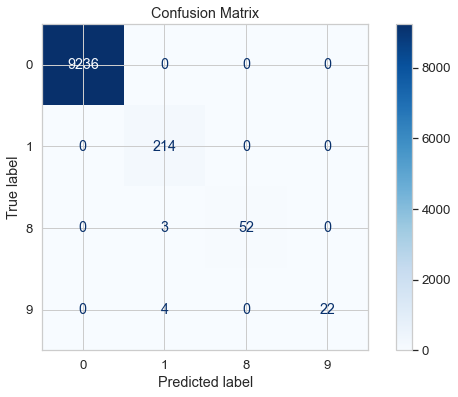

In [93]:
# defining parameter range 
# param_grid = {'C': [0.1, 1, 10],  
#                 'gamma': [1, 0.1, 0.01, 0.001], 
#                 'gamma':['scale', 'auto'],
#                 'kernel': ['linear','rbf']}
# svm = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=5)
SVM = svm.SVC(kernel='linear')
#model = LogisticRegression()
SVM.fit(X_train,y_train)

#print(model.best_params_)
SVM_predictions = SVM.predict(X_valid)


print(classification_report(y_valid,SVM_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( SVM, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')


In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

No handles with labels found to put in legend.


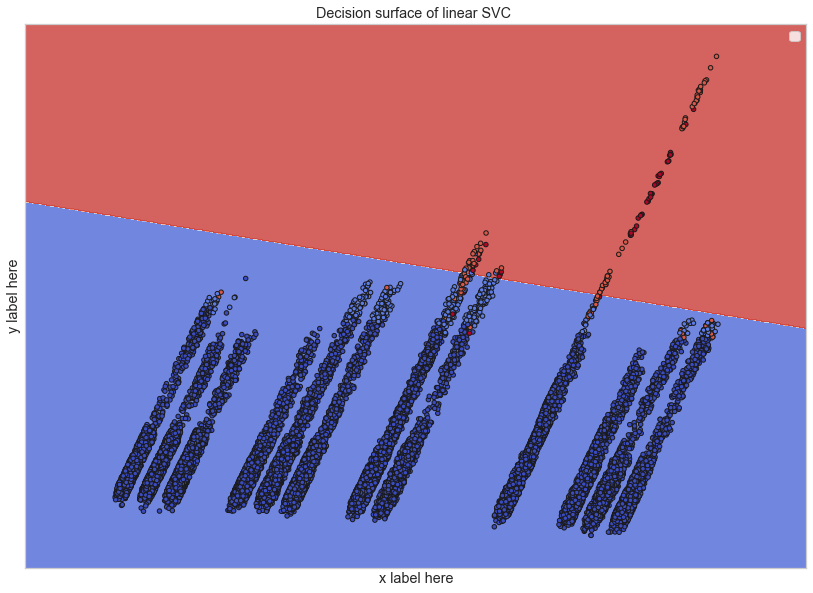

In [ ]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9236
           1       0.97      0.99      0.98       214
           8       0.96      0.95      0.95        55
           9       0.96      0.85      0.90        26

    accuracy                           1.00      9531
   macro avg       0.97      0.94      0.96      9531
weighted avg       1.00      1.00      1.00      9531



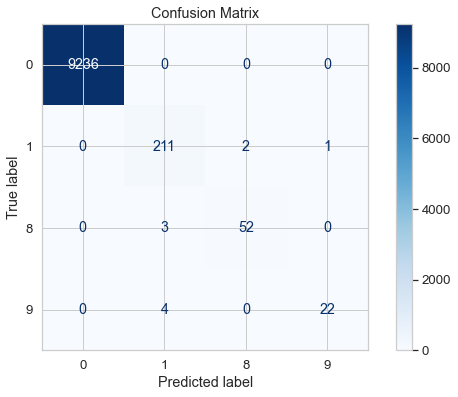

In [94]:
# param_grid = {'n_estimators': [50, 100, 120, 150],  
#                 'criterion': ['gini','entropy'], 
#                 'max_depth':[100,200,300]
#                 }
# RF = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=5)
RF = RandomForestClassifier(n_estimators=120,criterion='entropy',max_depth=100) #best parameters
RF.fit(X_train,y_train)

#print(RF.best_params_)
RF_predictions = RF.predict(X_valid)


print(classification_report(y_valid,RF_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( RF, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')


In [ ]:
#f1_score(y_valid,grid_predictions,average=None).mean()

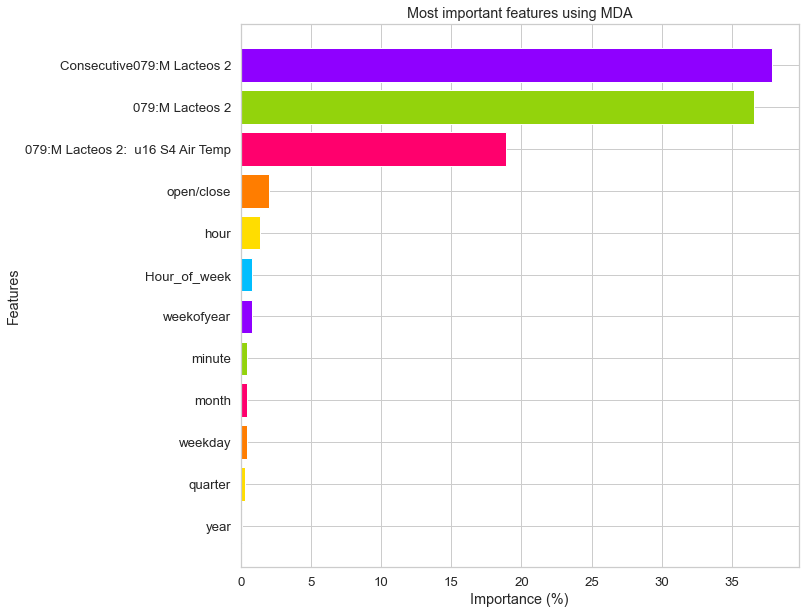

In [95]:
fig =plt.figure(figsize=(10,10))
X = dataset.drop(dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]],axis=1)
importance = RF.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
   # print('{}-{:.2f}%'.format(X.columns[index], (importance[index] *100.0)))
    plt.barh(X.columns[index], (importance[index] *100.0))
    plt.title('Most important features using MDA')
    plt.xlabel('Importance (%)')
    plt.ylabel('Features')
plt.show()


# ANN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9236
           1       0.97      0.99      0.98       214
           8       1.00      0.95      0.97        55
           9       0.92      0.85      0.88        26

    accuracy                           1.00      9531
   macro avg       0.97      0.95      0.96      9531
weighted avg       1.00      1.00      1.00      9531



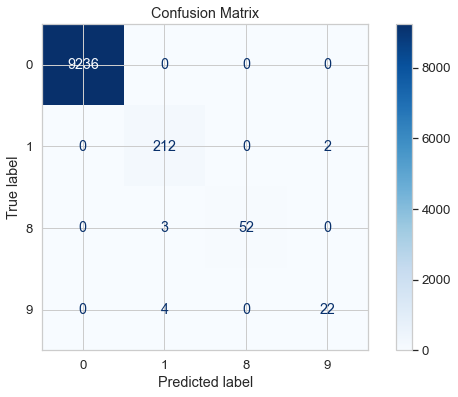

In [96]:
# param_grid = {'hidden_layer_sizes': [50, 100, 120, 150],  
#                 'learning_rate_init': [0.1,0.01,0.001], 
#                 'solver':['lbfgs', 'sgd', 'adam']
#                 }
# ANN = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3,n_jobs=5)
ANN = MLPClassifier(hidden_layer_sizes= 50, learning_rate_init= 0.01, solver ='adam')
ANN.fit(X_train,y_train)

#print(ANN.best_params_)
ANN_predictions = ANN.predict(X_valid)


print(classification_report(y_valid,ANN_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( ANN, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')

# KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9236
           1       0.97      0.99      0.98       214
           8       0.95      0.95      0.95        55
           9       0.90      0.73      0.81        26

    accuracy                           1.00      9531
   macro avg       0.95      0.92      0.93      9531
weighted avg       1.00      1.00      1.00      9531



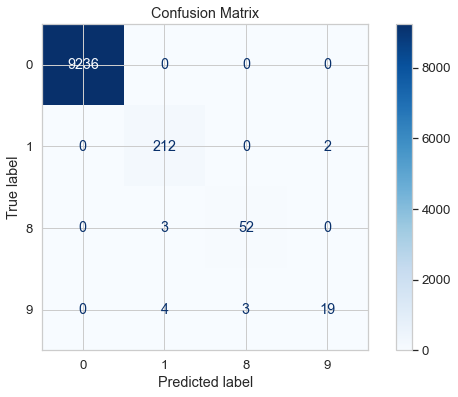

In [97]:
# param_grid = {'n_neighbors': [5, 10],  
#                 'leaf_size': [20,30,40], 
#                 'algorithm':['auto', 'ball_tree', 'kd_tree']
#                 }
#KNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3,n_jobs=5)
KNN = KNeighborsClassifier(algorithm ='auto', leaf_size = 20, n_neighbors= 5)
KNN.fit(X_train,y_train)

#print(KNN.best_params_)
KNN_predictions = KNN.predict(X_valid)


print(classification_report(y_valid,KNN_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( KNN, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')

In [98]:
models=[]
models.append(('SVM',SVM_predictions))
models.append(('RF',RF_predictions))
models.append(('ANN',ANN_predictions))
models.append(('KNN',KNN_predictions))

results =pd.DataFrame(columns=['Algorithm','F1_mean'])

In [99]:
i=0
for name, preds in models:

    f1_scores = f1_score(y_valid,preds, average=None).mean()
    results.loc[i]=[name,f1_scores]
    i+=1
    
print(results)


  Algorithm   F1_mean
0       SVM  0.968134
1        RF  0.957235
2       ANN  0.957794
3       KNN  0.933295


In [100]:
model = results['Algorithm'].loc[results['F1_mean']== max(results['F1_mean'])]
model

0    SVM
Name: Algorithm, dtype: object

# OverSampling SMOTE

In [101]:
final_classes = pd.DataFrame(dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]].value_counts()).to_dict('dict')
final_classes[0]

{(0,): 46178, (1,): 1067, (8,): 277, (9,): 131}

In [102]:
strategy = {}
#for i in range(len(strategy[0])):
for keys,values in final_classes[0].items():
    if keys[0]==0:
        strategy[int(keys[0])]=int(values)
    else:
        strategy[int(keys[0])]=int(values)+15000

        #strat[i].append(keys[0])

strategy

{0: 46178, 1: 16067, 8: 15277, 9: 15131}

In [114]:
# strategy = {0:33130,
#             1:15000,
#             2:10000,  
#             3:15000, 
#             6:12000,     
#             7:15000,                  
#             8:15000,               
#             9:20000
#                  }
X_upsampled, y_upsampled = feature_engineering.class_imbalance_fix(X_train, y_train, sampling=strategy)
SVM.fit(X_upsampled,y_upsampled)

#print(model.best_params_)
grid_predictions = SVM.predict(X_valid)


print(classification_report(y_valid,grid_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( SVM, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')


# Testing 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4134
           1       0.99      1.00      0.99       134
           8       1.00      0.96      0.98        28
           9       1.00      0.96      0.98        24

    accuracy                           1.00      4320
   macro avg       1.00      0.98      0.99      4320
weighted avg       1.00      1.00      1.00      4320



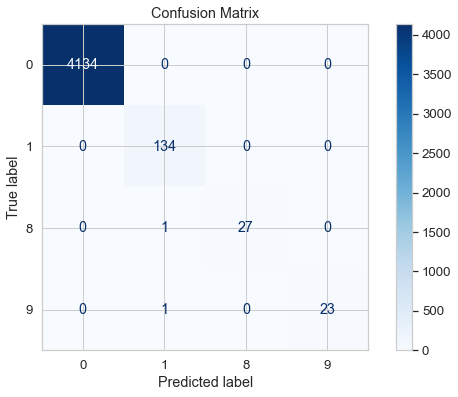

In [105]:
test_predictions = SVM.predict(X_test)
print(classification_report(y_test,test_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( SVM, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')

# End result

In [106]:
predictions = pd.DataFrame(test_predictions,columns=['predictions'])
predictions

predictions
0               0
1               0
2               0
3               0
4               0
...           ...
4315            0
4316            0
4317            0
4318            0
4319            0

[4320 rows x 1 columns]

In [107]:
pred = predictions.merge(test.reset_index(), right_index=True,left_index=True)

In [108]:
pred['test']='test'
pred =pred.set_index('Timetag')
pred

predictions  079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                                         
2021-08-01 00:05:00            0              4.0                         0.0   
2021-08-01 00:15:00            0              6.2                         0.0   
2021-08-01 00:25:00            0              4.9                         0.0   
2021-08-01 00:35:00            0              3.9                         0.0   
2021-08-01 00:45:00            0              5.6                         0.0   
...                          ...              ...                         ...   
2021-08-30 23:15:00            0              4.2                         0.0   
2021-08-30 23:25:00            0              4.9                         0.0   
2021-08-30 23:35:00            0              4.4                         0.0   
2021-08-30 23:45:00            0              4.4                         0.0   
2021-08-30 23:55:00            0              3.8                         0.0   

                     Status_079:M Lacteos 2  \
Timetag                                       
2021-08-01 00:05:00                       0   
2021-08-01 00:15:00                       0   
2021-08-01 00:25:00                       0   
2021-08-01 00:35:00                       0   
2021-08-01 00:45:00                       0   
...                                     ...   
2021-08-30 23:15:00                       0   
2021-08-30 23:25:00                       0   
2021-08-30 23:35:00                       0   
2021-08-30 23:45:00                       0   
2021-08-30 23:55:00                       0   

                     079:M Lacteos 2:  u16 S4 Air Temp  year  weekday  month  \
Timetag                                                                        
2021-08-01 00:05:00                                0.9  2021        6      8   
2021-08-01 00:15:00                                4.1  2021        6      8   
2021-08-01 00:25:00                                2.0  2021        6      8   
2021-08-01 00:35:00                                1.1  2021        6      8   
2021-08-01 00:45:00                                3.6  2021        6      8   
...                                                ...   ...      ...    ...   
2021-08-30 23:15:00                                0.0  2021        0      8   
2021-08-30 23:25:00                                1.6  2021        0      8   
2021-08-30 23:35:00                                0.4  2021        0      8   
2021-08-30 23:45:00                                0.1  2021        0      8   
2021-08-30 23:55:00                               -0.5  2021        0      8   

                     weekofyear  quarter  minute  hour  Hour_of_week  \
Timetag                                                                
2021-08-01 00:05:00          30        3       5     0           144   
2021-08-01 00:15:00          30        3      15     0           144   
2021-08-01 00:25:00          30        3      25     0           144   
2021-08-01 00:35:00          30        3      35     0           144   
2021-08-01 00:45:00          30        3      45     0           144   
...                         ...      ...     ...   ...           ...   
2021-08-30 23:15:00          35        3      15    23            23   
2021-08-30 23:25:00          35        3      25    23            23   
2021-08-30 23:35:00          35        3      35    23            23   
2021-08-30 23:45:00          35        3      45    23            23   
2021-08-30 23:55:00          35        3      55    23            23   

                     open/close  test  
Timetag                                
2021-08-01 00:05:00           0  test  
2021-08-01 00:15:00           0  test  
2021-08-01 00:25:00           0  test  
2021-08-01 00:35:00           0  test  
2021-08-01 00:45:00           0  test  
...                         ...   ...  
2021-08-30 23:15:00           0  test  
2021-08-30 23:25:

In [109]:
final_show = pd.concat([dataset,pred],axis=0)

In [110]:

final_show

079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                            
2020-09-01 00:05:00              5.1                         0.0   
2020-09-01 00:15:00              4.7                         0.0   
2020-09-01 00:25:00              4.7                         0.0   
2020-09-01 00:35:00              4.2                         0.0   
2020-09-01 00:45:00              3.9                         0.0   
...                              ...                         ...   
2021-08-30 23:15:00              4.2                         0.0   
2021-08-30 23:25:00              4.9                         0.0   
2021-08-30 23:35:00              4.4                         0.0   
2021-08-30 23:45:00              4.4                         0.0   
2021-08-30 23:55:00              3.8                         0.0   

                     Status_079:M Lacteos 2  \
Timetag                                       
2020-09-01 00:05:00                       0   
2020-09-01 00:15:00                       0   
2020-09-01 00:25:00                       0   
2020-09-01 00:35:00                       0   
2020-09-01 00:45:00                       0   
...                                     ...   
2021-08-30 23:15:00                       0   
2021-08-30 23:25:00                       0   
2021-08-30 23:35:00                       0   
2021-08-30 23:45:00                       0   
2021-08-30 23:55:00                       0   

                     079:M Lacteos 2:  u16 S4 Air Temp  year  weekday  month  \
Timetag                                                                        
2020-09-01 00:05:00                                1.2  2020        1      9   
2020-09-01 00:15:00                                0.9  2020        1      9   
2020-09-01 00:25:00                                0.9  2020        1      9   
2020-09-01 00:35:00                                0.0  2020        1      9   
2020-09-01 00:45:00                               -0.4  2020        1      9   
...                                                ...   ...      ...    ...   
2021-08-30 23:15:00                                0.0  2021        0      8   
2021-08-30 23:25:00                                1.6  2021        0      8   
2021-08-30 23:35:00                                0.4  2021        0      8   
2021-08-30 23:45:00                                0.1  2021        0      8   
2021-08-30 23:55:00                               -0.5  2021        0      8   

                     weekofyear  quarter  minute  hour  Hour_of_week  \
Timetag                                                                
2020-09-01 00:05:00          36        3       5     0            24   
2020-09-01 00:15:00          36        3      15     0            24   
2020-09-01 00:25:00          36        3      25     0            24   
2020-09-01 00:35:00          36        3      35     0            24   
2020-09-01 00:45:00          36        3      45     0            24   
...                         ...      ...     ...   ...           ...   
2021-08-30 23:15:00          35        3      15    23            23   
2021-08-30 23:25:00          35        3      25    23            23   
2021-08-30 23:35:00          35        3      35    23            23   
2021-08-30 23:45:00          35        3      45    23            23   
2021-08-30 23:55:00          35        3      55    23            23   

                     open/close  predictions  test  
Timetag                                             
2020-09-01 00:05:00           0          NaN   NaN  
2020-09-01 00:15:00           0          NaN   NaN  
2020-09-01 00:25:00           0          NaN   NaN  
2020-09-01 00:35:00           0          NaN   NaN  
2020-09-01 00:45:00           0          NaN   NaN  
...                         ...          ...   ...  
2021-08-30 23:15:00           0          0.0  test  
2021-08-30 23:25:00           0          0.0  test  
2021-08-30 23:35

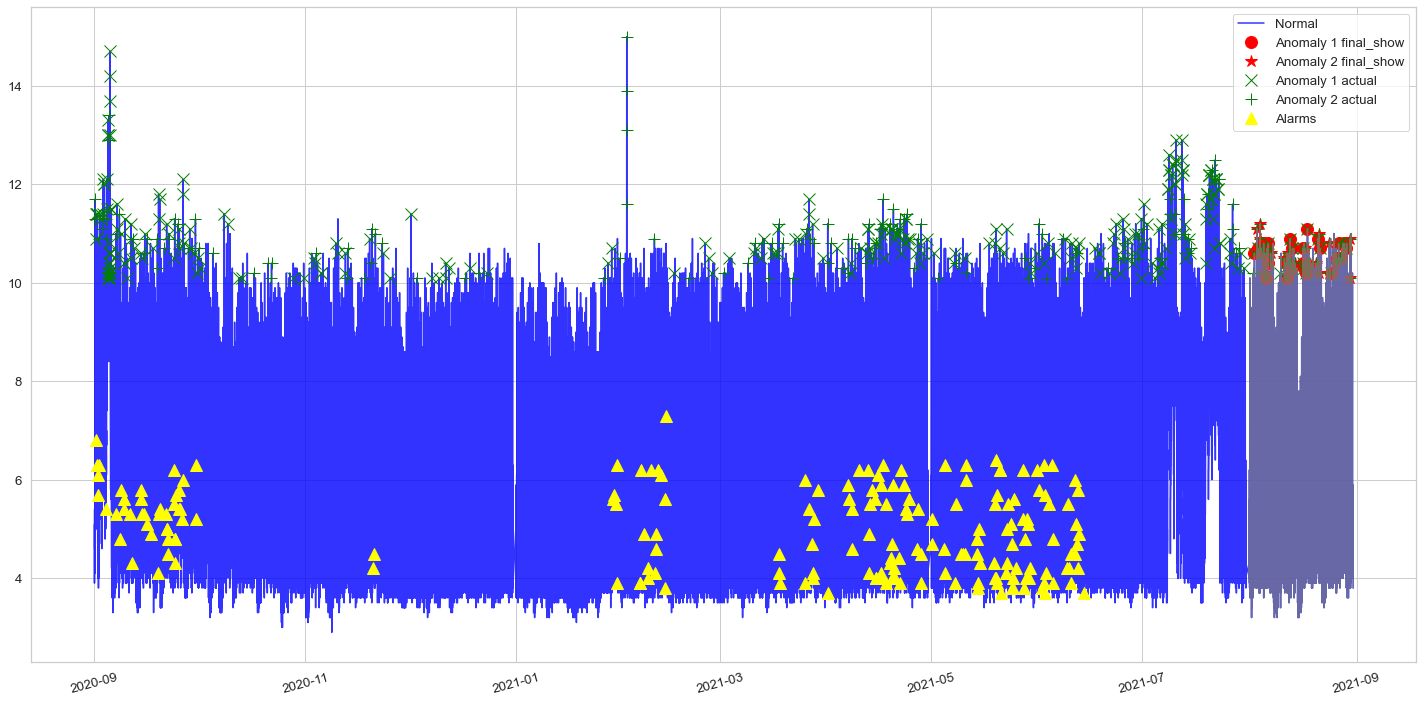

In [111]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(final_show.index.values,final_show.iloc[:,0], color='blue',label='Normal', alpha=0.8) #initial classes
    
ax.plot(final_show[final_show['predictions']==8].iloc[:,0],linestyle='none', marker='o', color='red', markersize=12,label='Anomaly 1 final_show')#initial classes
ax.plot(final_show[final_show['predictions']==9].iloc[:,0],linestyle='none', marker='*', color='red', markersize=12,label='Anomaly 2 final_show')#initial classes

ax.plot(final_show[final_show['Status_079:M Lacteos 2']==8].iloc[:,0], linestyle='none', marker='x', color='green', markersize=12,label='Anomaly 1 actual')#initial classes
ax.plot(final_show[final_show['Status_079:M Lacteos 2']==9].iloc[:,0],linestyle='none', marker='+', color='green', markersize=12,label='Anomaly 2 actual')#initial classes
ax.plot(empty_alarms[6].iloc[:,0],linestyle='none', marker='^', color='yellow', markersize=12,label='Alarms')#initial classes
ax.plot(final_show[final_show['test']=='test'].iloc[:,0],color='grey', alpha=0.7)

ax.legend(loc='best')    
ax.tick_params(axis='x',labelrotation=15)
    
fig.tight_layout()
plt.show()